<a href="https://colab.research.google.com/github/imaginaryBuddy/imdbMoviesDSAI/blob/main/EDA_on_last_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries 
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
sb.set() 

In [ ]:
# importing the dataset from github 
url = 'https://raw.githubusercontent.com/imaginaryBuddy/tripleH/main/imdbTrain.csv'
imdb = pd.read_csv(url)
imdb.head()

# from google.colab import drive
# drive.mount('/content/drive')

Unnamed: 0  color    director_name  num_critic_for_reviews  duration  \
0        4078  Color      David Raynr                    16.0      94.0   
1        2150  Color    Colin Higgins                    11.0     114.0   
2        4790  Color     Eric England                    15.0      81.0   
3        4841  Color      Babar Ahmed                     8.0      90.0   
4        4823  Color  Paul Fierlinger                    51.0      83.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      9.0                   200.0     Deon Richmond   
1                     19.0                   842.0      Barry Corbin   
2                     15.0                    93.0       Ace Marrero   
3                      0.0                    32.0  Alexander Wraith   
4                      3.0                   258.0      Peter Gerety   

   actor_1_facebook_likes       gross  ... num_user_for_reviews language  \
0                   927.0   9016377.0  ...                  8.0  English   
1                  1000.0  69700000.0  ...                 48.0  English   
2                   847.0         NaN  ...                  6.0  English   
3                   502.0         NaN  ...                 18.0  English   
4                   812.0    246574.0  ...                 15.0  English   

  country  content_rating      budget title_year  actor_2_facebook_likes  \
0     USA               R         NaN     1999.0                   209.0   
1     USA               R  35000000.0     1982.0                   883.0   
2     USA             NaN         NaN     2013.0                    94.0   
3     USA           PG-13    350000.0     2009.0                   119.0   
4     USA             NaN         NaN     2009.0                   277.0   

  imdb_score aspect_ratio  movie_facebook_likes  
0        5.2         1.85                   143  
1        5.8         2.35                     0  
2        4.1        16.00                    61  
3        3.2          NaN                    53  
4        6.9         1.85                   675  

[5 rows x 29 columns]

In [ ]:
# imdb_train = pd.read_csv("drive/My Drive/SC1015 Project TripleH/imdbTrain.csv")
# imdb_train.head()
# print() 

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3933 non-null   int64  
 1   color                      3915 non-null   object 
 2   director_name              3854 non-null   object 
 3   num_critic_for_reviews     3891 non-null   float64
 4   duration                   3922 non-null   float64
 5   director_facebook_likes    3854 non-null   float64
 6   actor_3_facebook_likes     3913 non-null   float64
 7   actor_2_name               3922 non-null   object 
 8   actor_1_facebook_likes     3927 non-null   float64
 9   gross                      3241 non-null   float64
 10  genres                     3933 non-null   object 
 11  actor_1_name               3927 non-null   object 
 12  movie_title                3933 non-null   object 
 13  num_voted_users            3933 non-null   int64

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] >= low) & (df_in[col_name] <= high)]
    return df_out

#UNI VARIATE



## LANGUAGE

In [ ]:
language = pd.DataFrame(imdb['language']).copy()
language.describe()

language
count      3925
unique       42
top     English
freq       3671

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


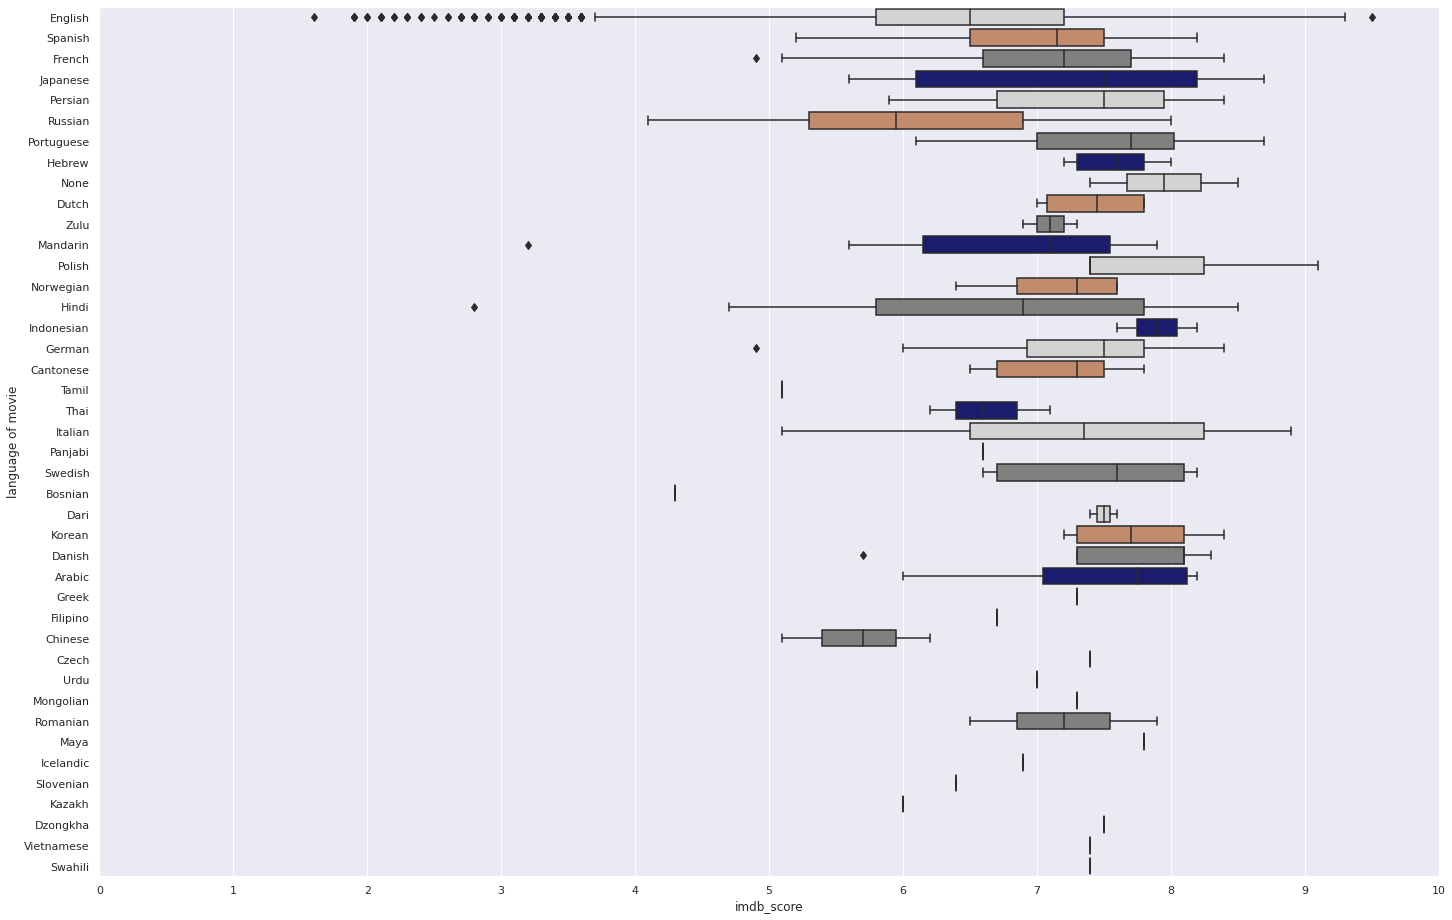

In [ ]:
plt.figure(figsize=(24,16))
p = sb.boxplot("imdb_score", "language", data = imdb, saturation = .6, fliersize = 6., palette = ["lightgray", sb.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "imdb_score", ylabel = "language of movie", xticks = range(11))

# Note: some of the languages do not have a boxplot as there is only 1 movie in the dataset from that language.

We will not be using language as a predictor of success because the dataset for language is highly imbalanced, with english dominating 3761 out of 4034 movies.

## COUNTRY

In [ ]:
country = pd.DataFrame(imdb['country']).copy()
country.describe()

country
count     3929
unique      60
top        USA
freq      2960

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


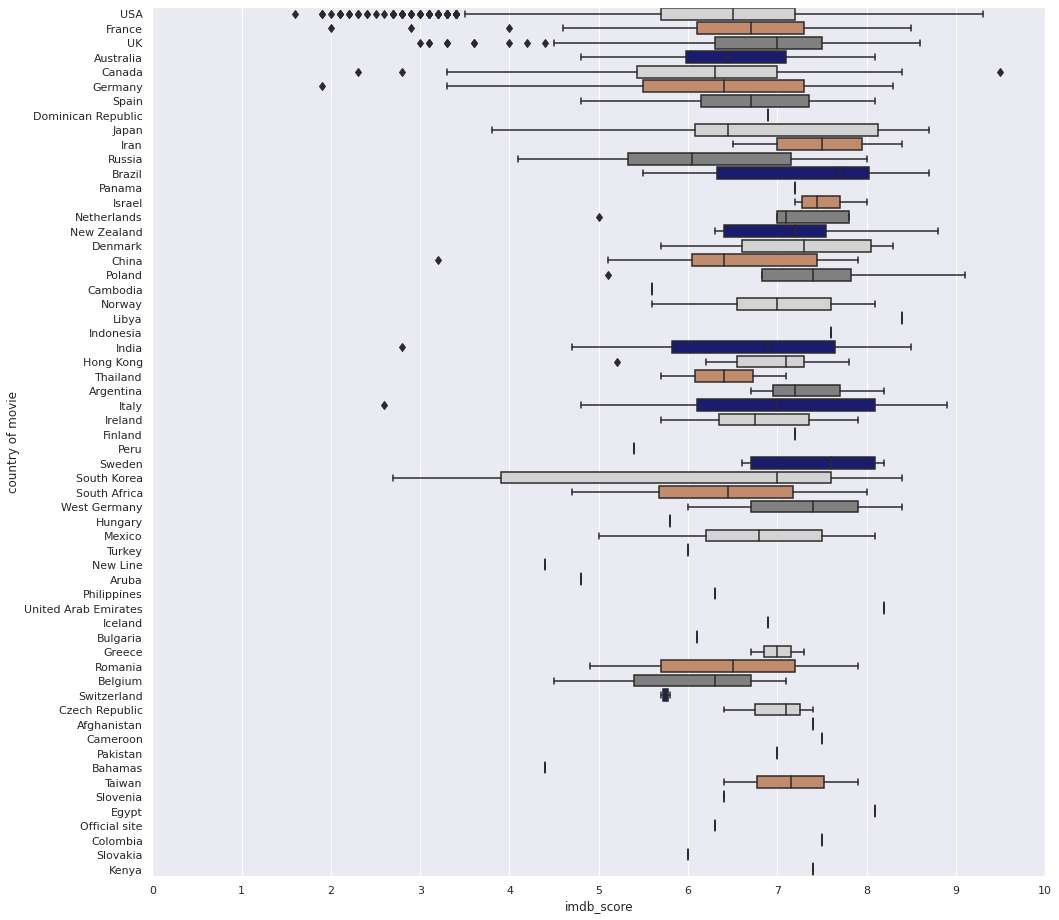

In [ ]:
plt.figure(figsize=(16,16))
p = sb.boxplot("imdb_score", "country", data = imdb, saturation = .6, fliersize = 6., palette = ["lightgray", sb.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "imdb_score", ylabel = "country of movie", xticks = range(11))

# Note: some of the countries do not have a boxplot as there is only 1 movie in the dataset from that country.

We will not be using country as a predictor of success because the dataset for country is highly imbalanced, with USA dominating 3026 out of 4034 movies.

## CONTENT RATING

In [ ]:
content_rating = pd.DataFrame(imdb['content_rating']).copy()
content_rating.describe()

content_rating
count            3695
unique             17
top                 R
freq             1667

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


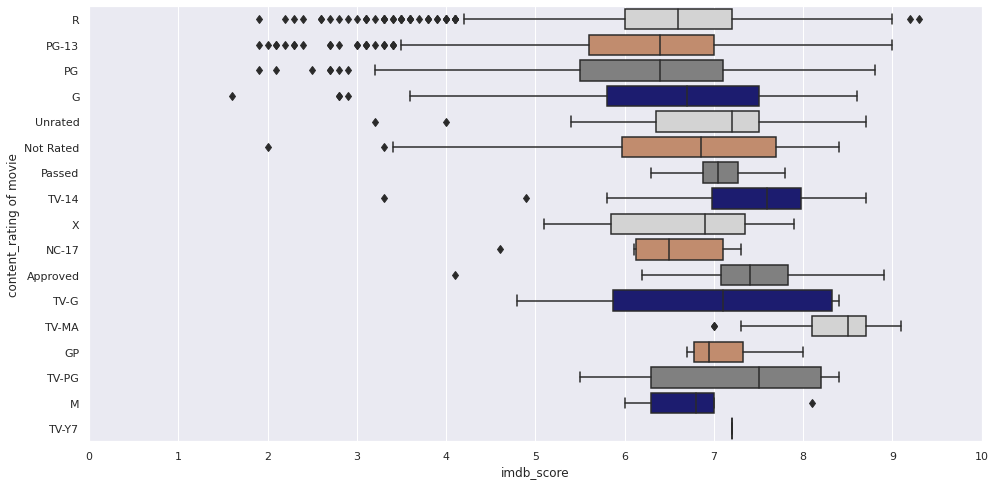

In [ ]:
plt.figure(figsize=(16,8))
p = sb.boxplot("imdb_score", "content_rating", data = imdb, saturation = .6, fliersize = 6., palette = ["lightgray", sb.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "imdb_score", ylabel = "content_rating of movie", xticks = range(11))

# Note: some of the content rating do not have a boxplot as there is only 1 movie in the dataset from that content rating.

## TITLE YEAR

In [ ]:
title_year = pd.DataFrame(imdb['title_year']).copy()
title_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title_year  3850 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


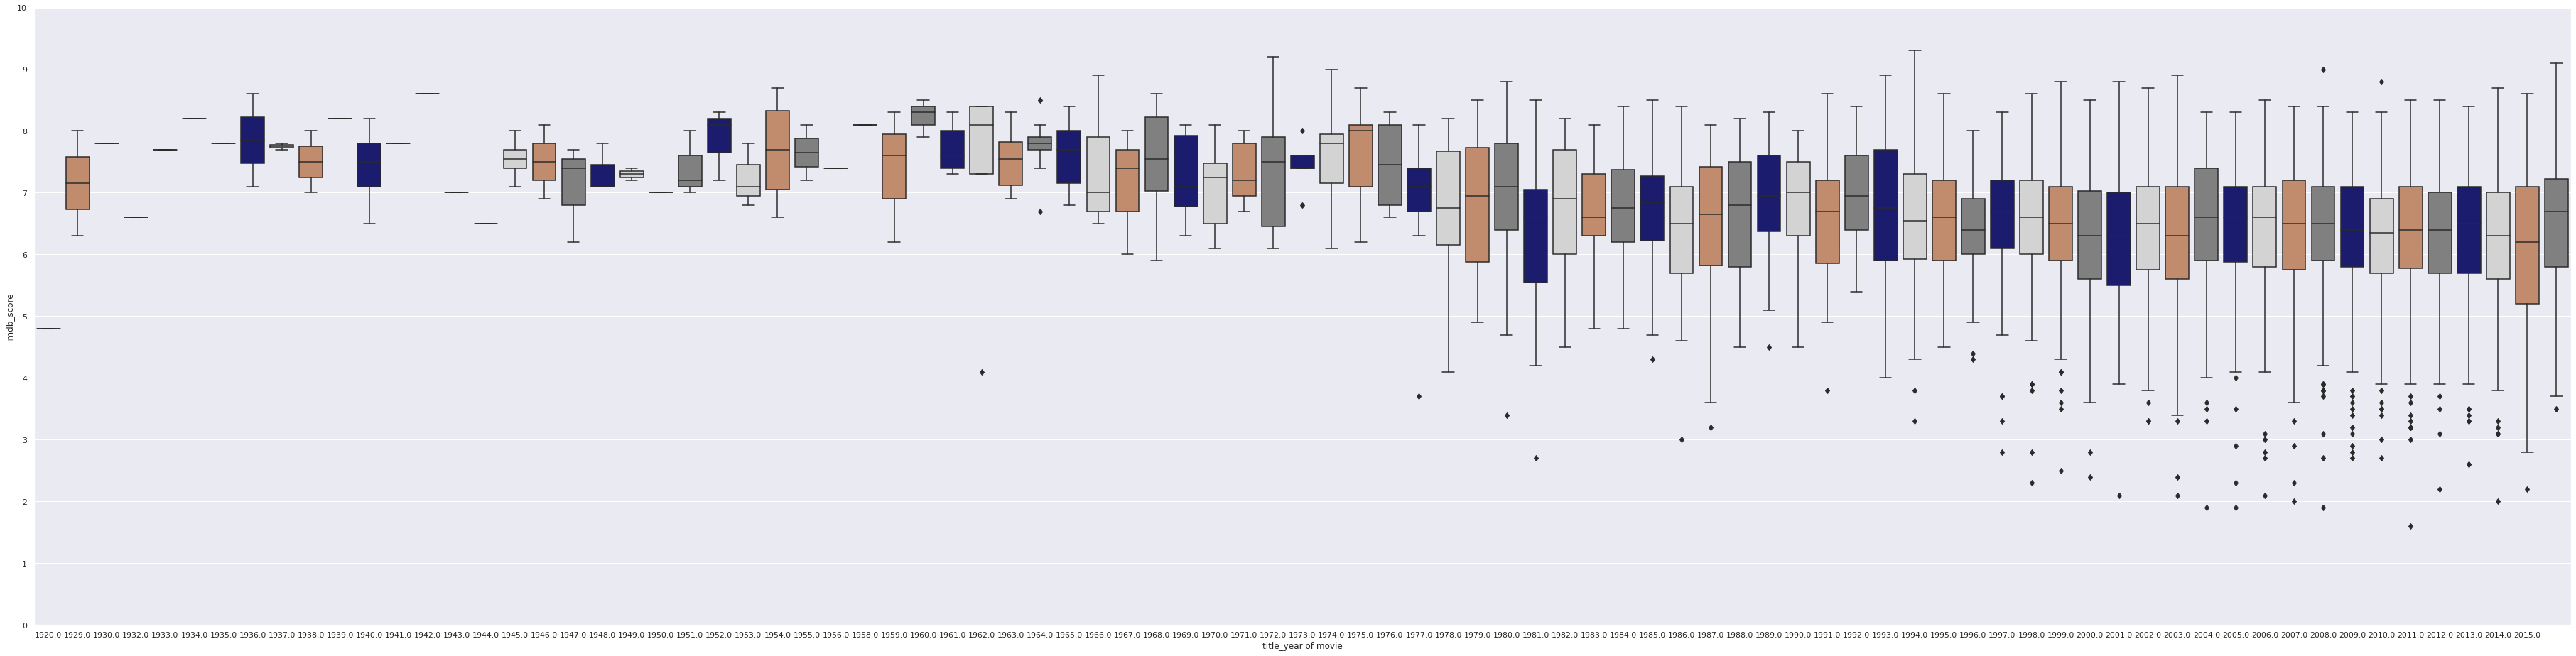

In [ ]:
plt.figure(figsize=(64,16))
p = sb.boxplot("title_year", "imdb_score", data = imdb, saturation = .6, fliersize = 6., palette = ["lightgray", sb.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "title_year of movie", ylabel = "imdb_score", xticks = range(86), yticks = range(11))

# Note: some of the year do not have a boxplot as there is only 1 movie in the dataset from that year.

Observation: seems like the older movies from 1920 to 1967 are more consistent in getting high imdb scores.

skewness :  title_year   -0.837496
dtype: float64


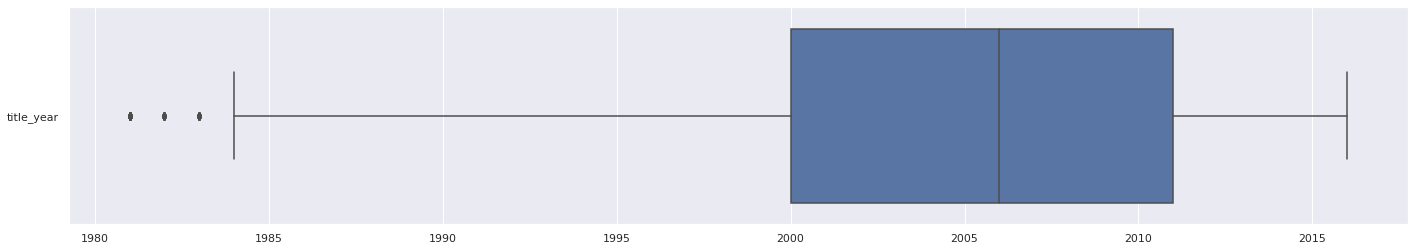

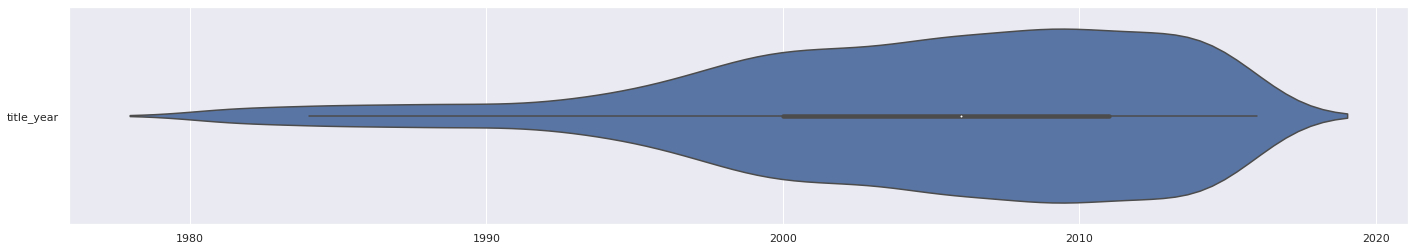

In [ ]:
# removing zero values
year = title_year.copy()
year.dropna(axis = 0, inplace = True)

# removing outliers
year_clean = remove_outlier(year, "title_year")

# box plot
f , axes = plt.subplots(figsize = (24,4))
sb.boxplot(data = year_clean, orient = 'h')

# violin plot
f , axes = plt.subplots(figsize = (24,4))
sb.violinplot(data = year_clean, orient = 'h')

# checking skewness
print ("skewness : ", year_clean.skew())

## BUDGET

We are only keeping the american movies for budget as we realise that the budget for other movies are recorded in euros or nok etc. ie. it is not standardised, and since most of the movies are from usa, we are thus keeping the american movies for a standardised budget.

In [ ]:
# extracting the movies from usa to make our budget dataframe
usa = imdb.loc[imdb.country=='USA', : ]
budget = pd.DataFrame(usa['budget']).copy()
budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  2721 non-null   float64
dtypes: float64(1)
memory usage: 46.2 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2552 entries, 1 to 3932
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  2552 non-null   float64
dtypes: float64(1)
memory usage: 39.9 KB

skewness :  budget    1.182578
dtype: float64


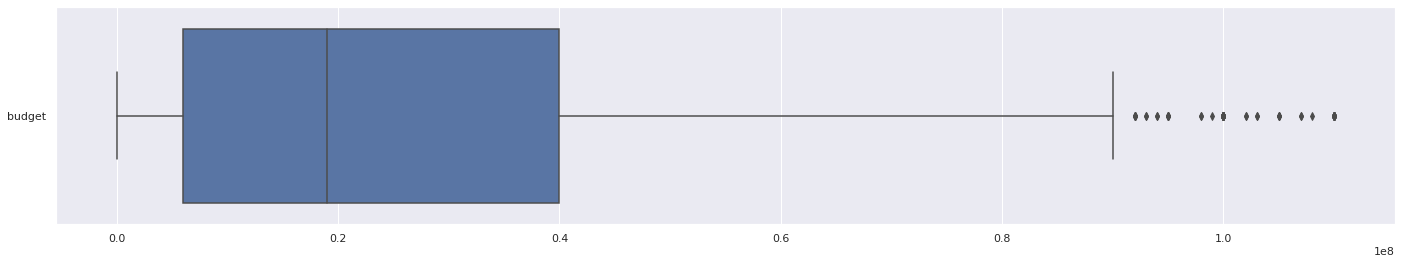

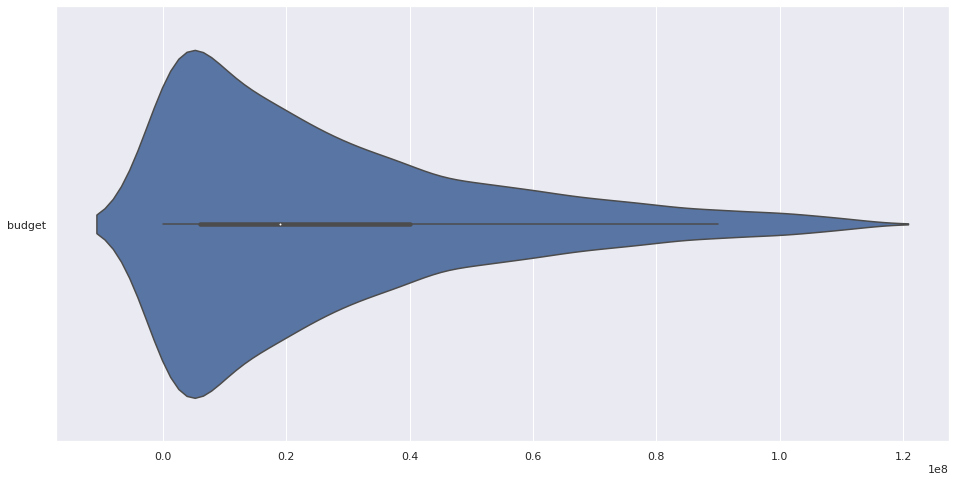

In [ ]:
# removing zero values
budget_clean = budget.copy()
budget_clean.dropna(axis = 0, inplace = True)

# removing outliers
budget_filtered = remove_outlier(budget_clean, "budget")
budget_filtered.info()
print()

# box plot
f , axes = plt.subplots(figsize = (24,4))
sb.boxplot(data = budget_filtered, orient = 'h')

# violin plot
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = budget_filtered, orient = "h")

# check skewness
print ("skewness : ", budget_filtered.skew())

## ACTOR 2 FACEBOOK LIKES

In [ ]:
actor2likes = pd.DataFrame(imdb['actor_2_facebook_likes']).copy()
actor2likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   actor_2_facebook_likes  3922 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


skewness :  actor_2_facebook_likes   -0.048467
dtype: float64


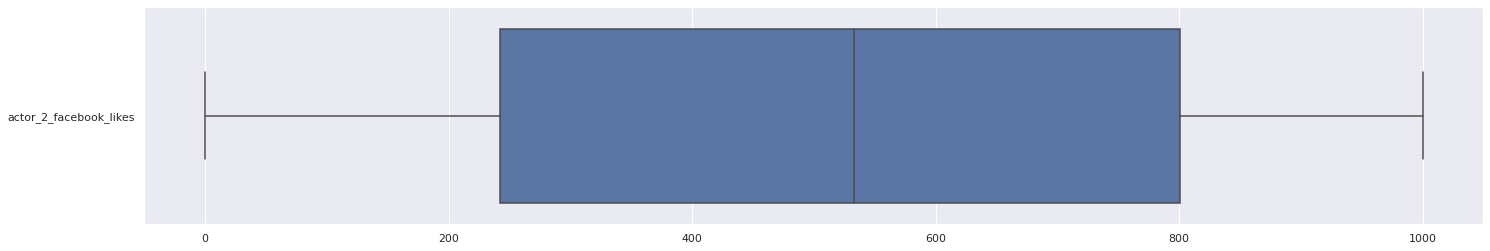

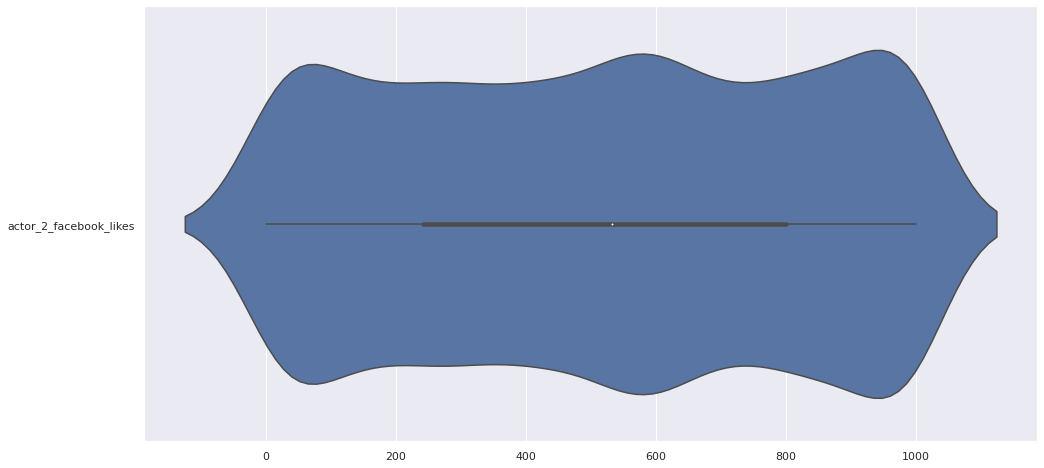

In [ ]:
# removing zero values
actor2 = actor2likes.copy()
actor2.dropna(axis = 0, inplace = True)

# removing outliers
actor2_clean = remove_outlier(actor2, "actor_2_facebook_likes")

# box plot
f , axes = plt.subplots(figsize = (24,4))
sb.boxplot(data = actor2_clean, orient = 'h')

# violin plot
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = actor2_clean, orient = "h")

# check skewness
print ("skewness : ", actor2_clean.skew())

## IMDB SCORE

In [ ]:
imdb_score = pd.DataFrame(imdb['imdb_score']).copy()
imdb_score.describe()

imdb_score
count  3933.000000
mean      6.439410
std       1.135434
min       1.600000
25%       5.800000
50%       6.600000
75%       7.200000
max       9.500000

As can be seen from above, the statistics show that the median imdb_score is 6.6, so we will use this bench mark to classify and separate imdb_score into 2 bins, a "bad" bin for imdb_score 1-6.5, and a "good" bin for imdb_score 6.6-10

skewness :  imdb_score   -0.317577
dtype: float64


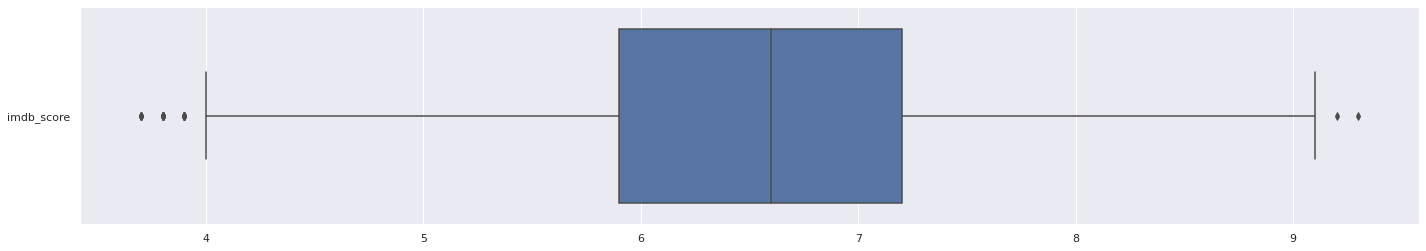

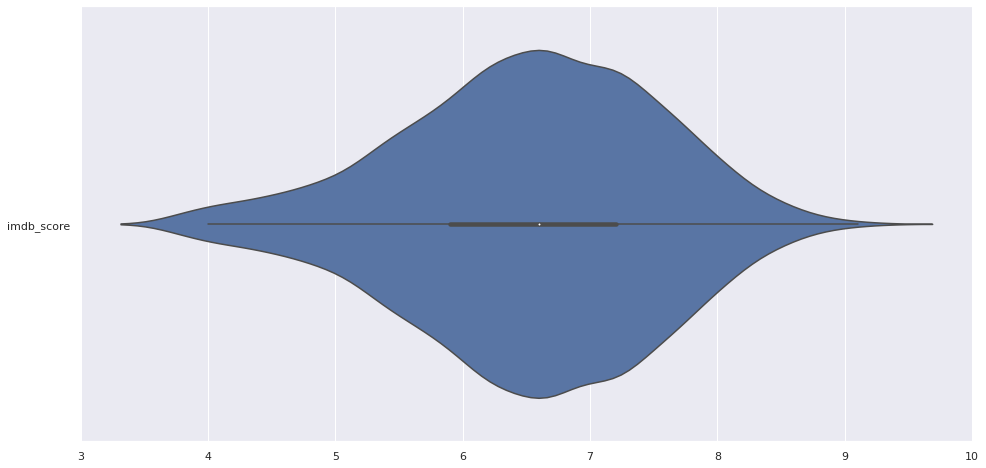

In [ ]:
# no zero/missing values

# removing outliers
imdb_score_clean = remove_outlier(imdb_score, "imdb_score")

# box plot
f , axes = plt.subplots(figsize = (24,4))
sb.boxplot(data = imdb_score_clean, orient = 'h')

# violin plot
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = imdb_score_clean, orient = "h")

# check skewness
print ("skewness : ", imdb_score_clean.skew())

## ASPECT RATIO

In [ ]:
aspect_ratio = pd.DataFrame(imdb['aspect_ratio']).copy()
aspect_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aspect_ratio  3663 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


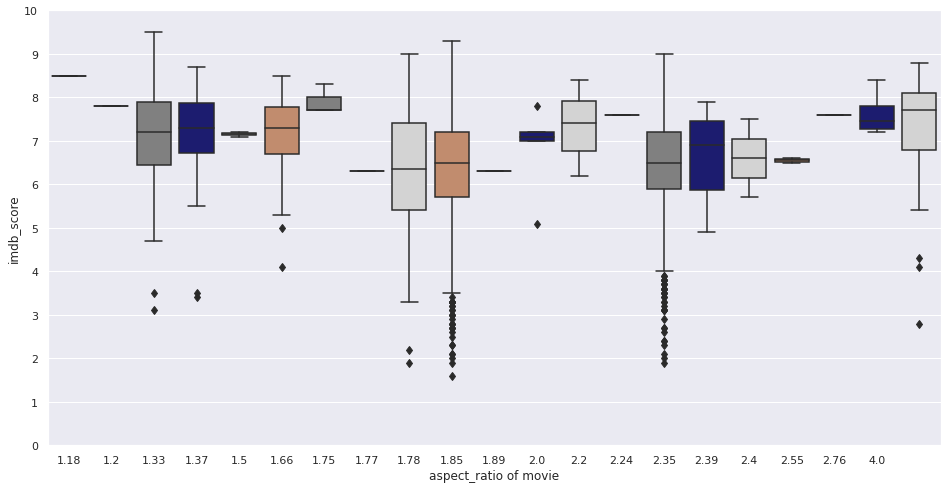

In [ ]:
plt.figure(figsize=(16, 8))
p = sb.boxplot("aspect_ratio", "imdb_score", data = imdb, saturation = .6, fliersize = 6., palette = ["lightgray", sb.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "aspect_ratio of movie", ylabel = "imdb_score", xticks = range(20), yticks = range(11))

# Note: some of the ratio do not have a boxplot as there is only 1 movie in the dataset from that ratio.

skewness :  aspect_ratio   -0.492617
dtype: float64


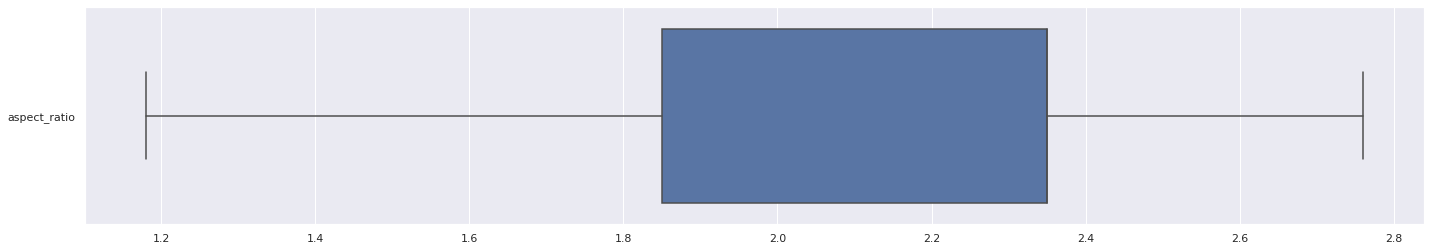

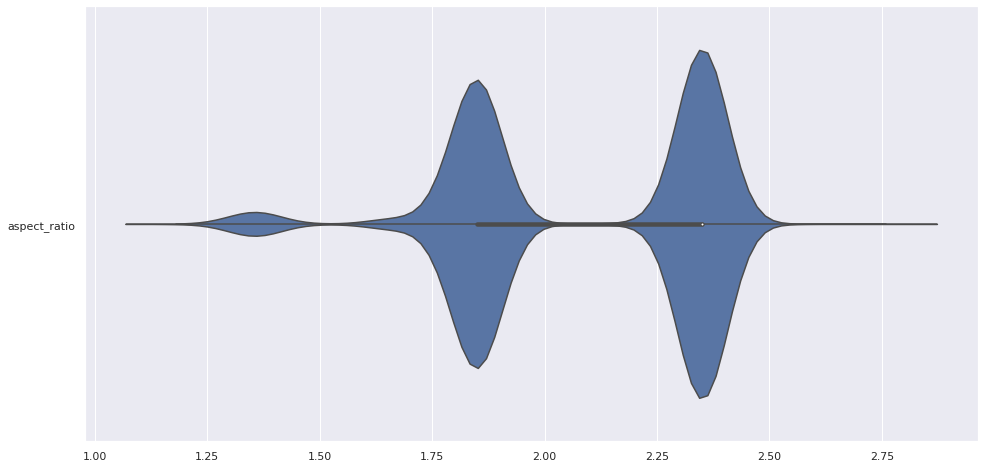

In [ ]:
# removing zero values
ratio = aspect_ratio.copy()
ratio.dropna(axis = 0, inplace = True)

# removing outliers
ratio_clean = remove_outlier(ratio, "aspect_ratio")

# box plot
f , axes = plt.subplots(figsize = (24,4))
sb.boxplot(data = ratio_clean, orient = 'h')

# violin plot
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = ratio_clean, orient = "h")

# check skewness
print ("skewness : ", ratio_clean.skew())

## MOVIE FACEBOOK LIKES

In [ ]:
movie_likes = pd.DataFrame(imdb['movie_facebook_likes']).copy()
movie_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   movie_facebook_likes  3933 non-null   int64
dtypes: int64(1)
memory usage: 30.9 KB


skewness :  movie_facebook_likes    4.693222
dtype: float64


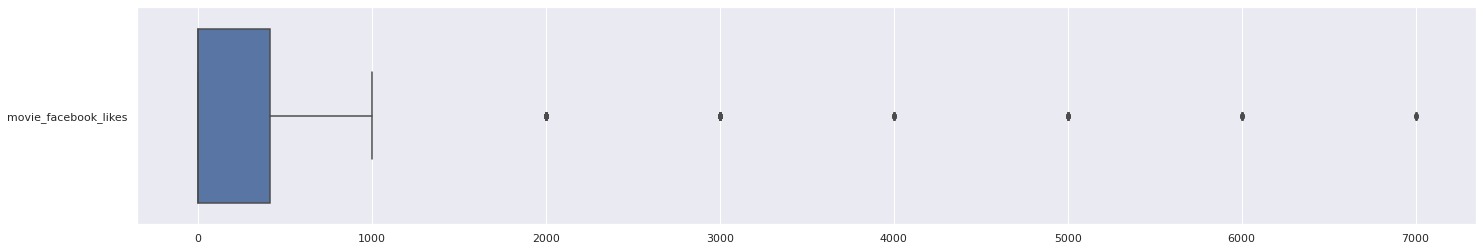

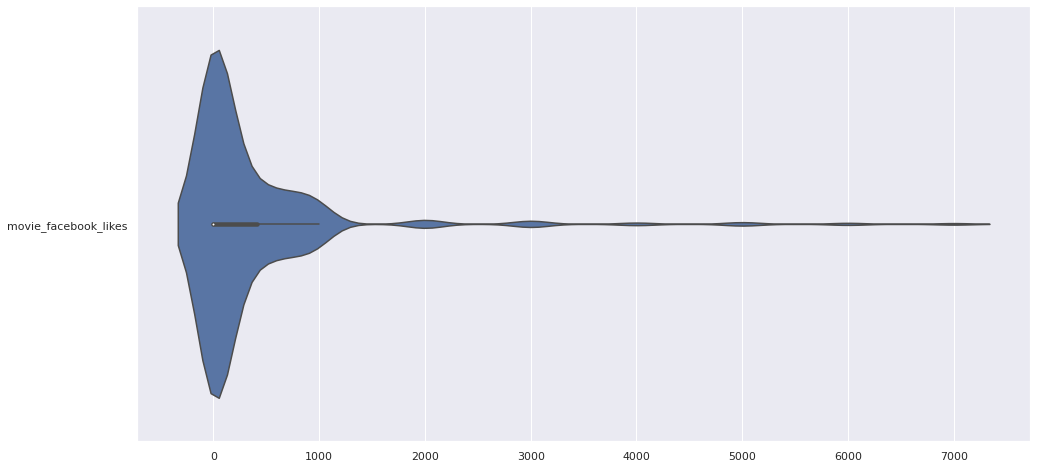

In [ ]:
# removing zero values
movie = movie_likes.copy()
movie.dropna(axis = 0, inplace = True)

# removing outliers
movie_clean = remove_outlier(movie, "movie_facebook_likes")

# box plot
f , axes = plt.subplots(figsize = (24,4))
sb.boxplot(data = movie_clean, orient = 'h')

# violin plot
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = movie_clean, orient = "h")

# check skewness
print ("skewness : ", movie_clean.skew())

# BIVARIATE

## BUDGET VS GROSS

In [ ]:
gross = pd.DataFrame(imdb["gross"]).copy()

gross_clean = gross.copy()
gross_clean.dropna(axis = 0, inplace = True)

gross_filtered = remove_outlier(gross_clean, "gross")

In [ ]:
budgetVSgross=pd.concat([budget_filtered,gross_filtered], axis=1).reindex(gross_filtered.index)
budgetVSgross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3930
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  2090 non-null   float64
 1   gross   3006 non-null   float64
dtypes: float64(2)
memory usage: 135.0 KB


In [ ]:
newBudgetGross=budgetVSgross.dropna(axis = 0, how ='any')
newBudgetGross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 1 to 3929
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  2090 non-null   float64
 1   gross   2090 non-null   float64
dtypes: float64(2)
memory usage: 49.0 KB


budget     gross
budget  1.000000  0.530287
gross   0.530287  1.000000

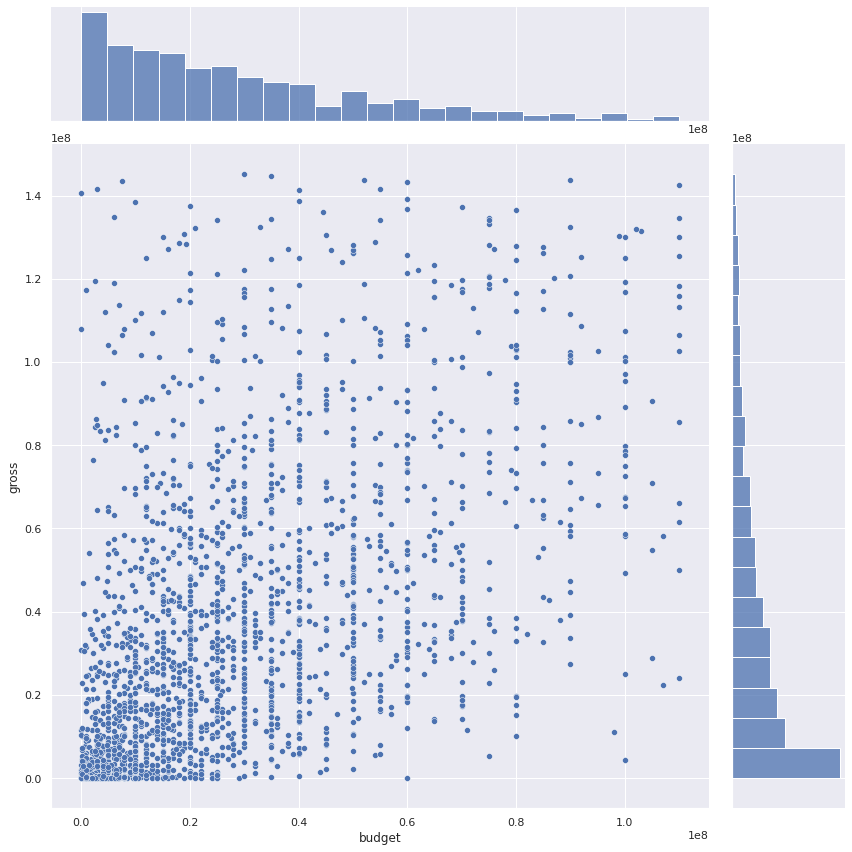

In [ ]:
sb.jointplot(data=newBudgetGross,x="budget", y="gross", height=12)

newBudgetGross.corr()

## BUDGET VS IMDB SCORE

budget  imdb_score
budget      1.000000   -0.012365
imdb_score -0.012365    1.000000

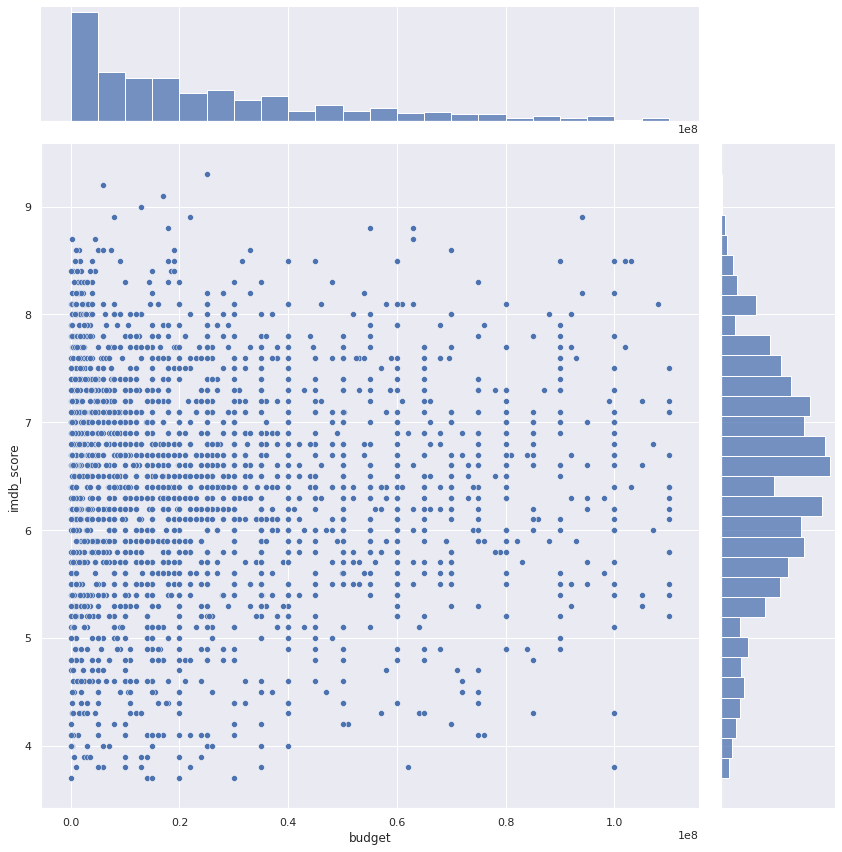

In [ ]:
budgetVSimdbscore = pd.concat([budget_filtered,imdb_score_clean], axis=1).reindex(imdb_score_clean.index)
newBudgetIMDB = budgetVSimdbscore.dropna(axis = 0, how = 'any')

sb.jointplot(data = newBudgetIMDB, x = "budget", y = "imdb_score", height = 12)
newBudgetIMDB.corr()

budget vs gross corr value = 0.508 <br>
budget vs imdb corr value = -0.02868

significant differential

## MOVIE FB LIKES VS GROSS

movie_facebook_likes     gross
movie_facebook_likes              1.000000  0.246751
gross                             0.246751  1.000000

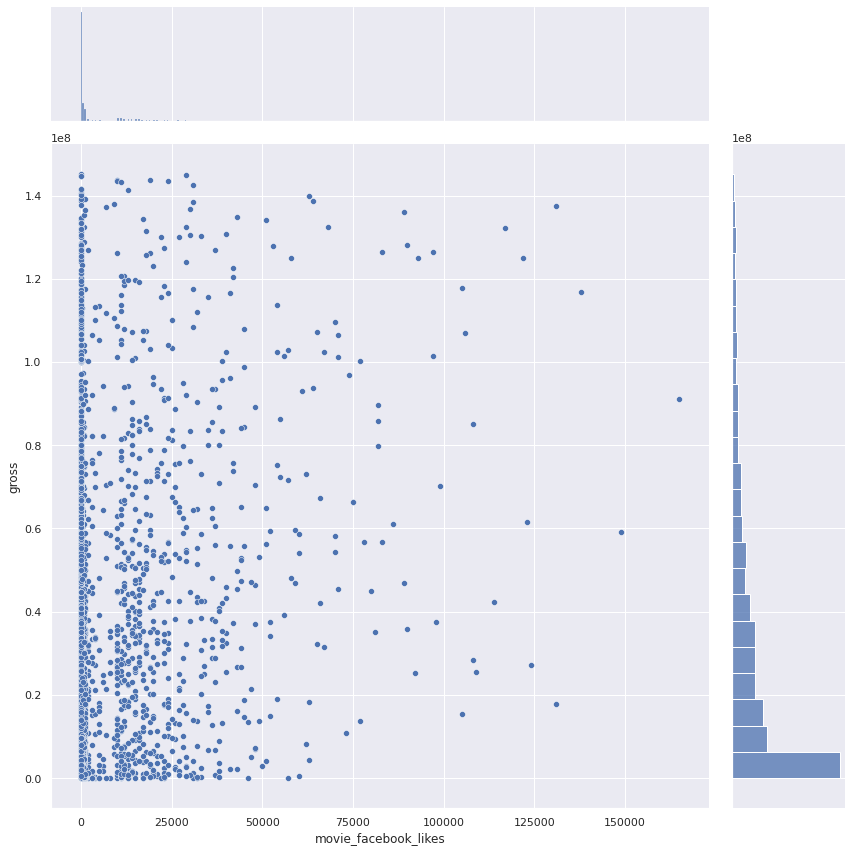

In [ ]:
movielikesVSgross=pd.concat([movie_likes,gross_filtered], axis=1).reindex(gross_filtered.index)
newMovielikesGross = movielikesVSgross.dropna(axis = 0, how = 'any')

sb.jointplot(data=newMovielikesGross,x="movie_facebook_likes", y="gross", height=12)
newMovielikesGross.corr()

## MOVIE FB LIKES VS IMDB SCORE

movie_facebook_likes  imdb_score
movie_facebook_likes              1.000000    0.279227
imdb_score                        0.279227    1.000000

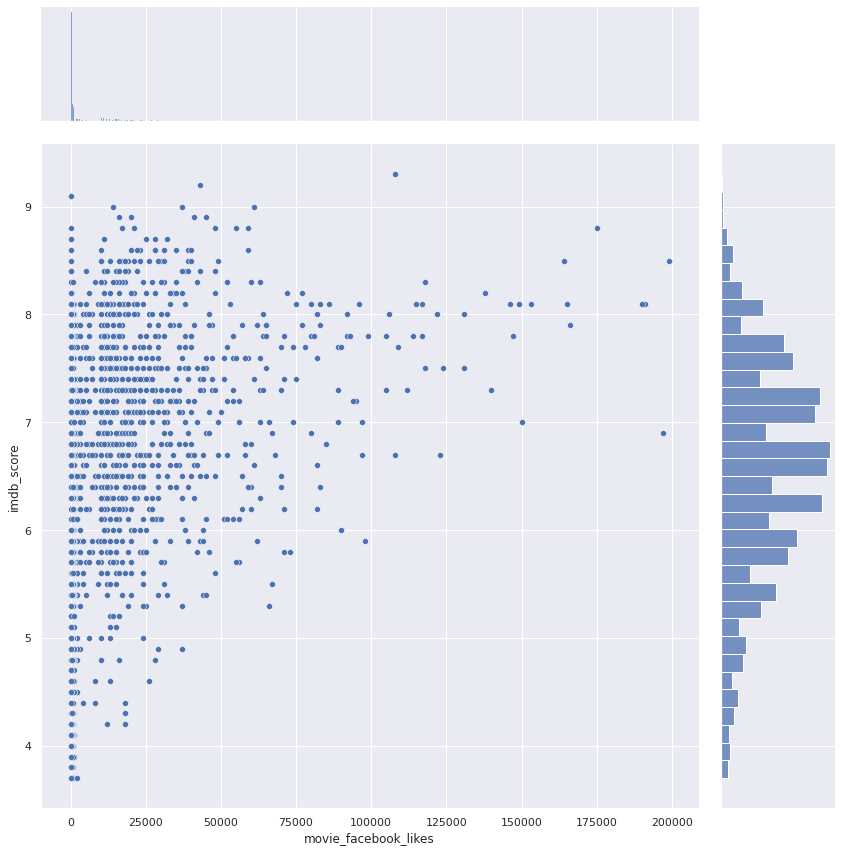

In [ ]:
movielikesVSimdbscore=pd.concat([movie_likes,imdb_score_clean], axis=1).reindex(imdb_score_clean.index)
newMovielikesIMDB = movielikesVSimdbscore.dropna(axis = 0, how = 'any')

sb.jointplot(data=newMovielikesIMDB,x="movie_facebook_likes", y="imdb_score", height =12)
newMovielikesIMDB.corr()

movies likes vs gross corr value = 0.2303 <br>
movies likes vs imdb corr value = 0.2664

slight differential

## ACTOR 2 FB LIKES VS GROSS

actor_2_facebook_likes     gross
actor_2_facebook_likes                1.000000  0.226517
gross                                 0.226517  1.000000

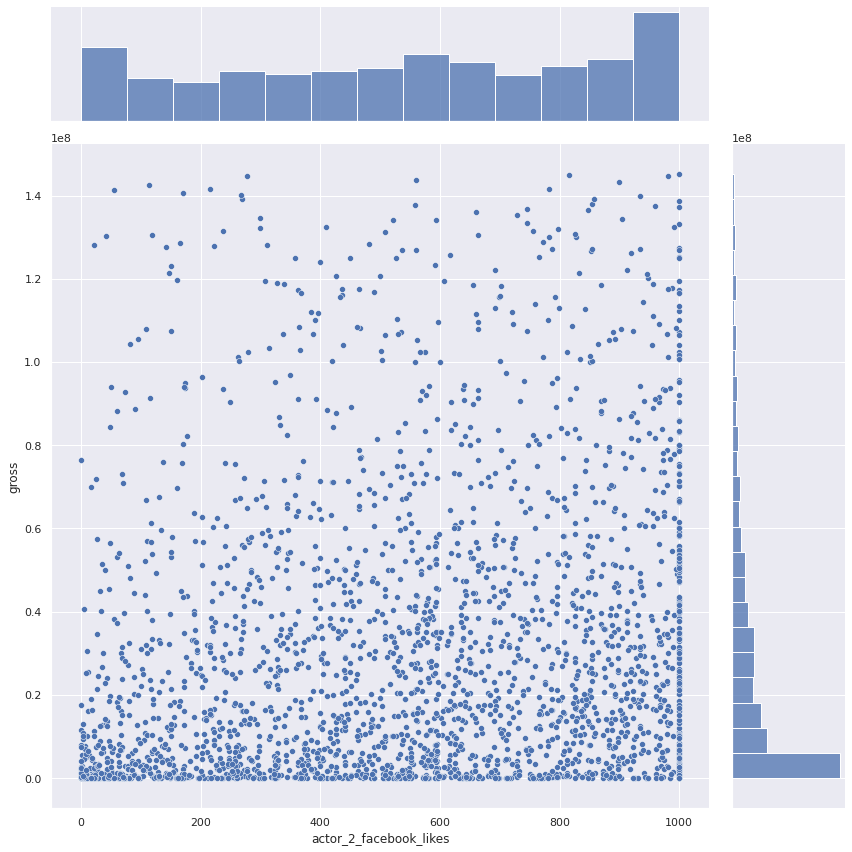

In [ ]:
actor2likesVSgross=pd.concat([actor2_clean,gross_filtered], axis=1).reindex(gross_filtered.index)
newActor2likesGross = actor2likesVSgross.dropna(axis = 0, how = 'any')

sb.jointplot(data=newActor2likesGross,x="actor_2_facebook_likes", y="gross", height =12)
newActor2likesGross.corr()

## ACTOR 2 FB LIKES VS IMDB SCORE

actor_2_facebook_likes  imdb_score
actor_2_facebook_likes                1.000000   -0.107271
imdb_score                           -0.107271    1.000000

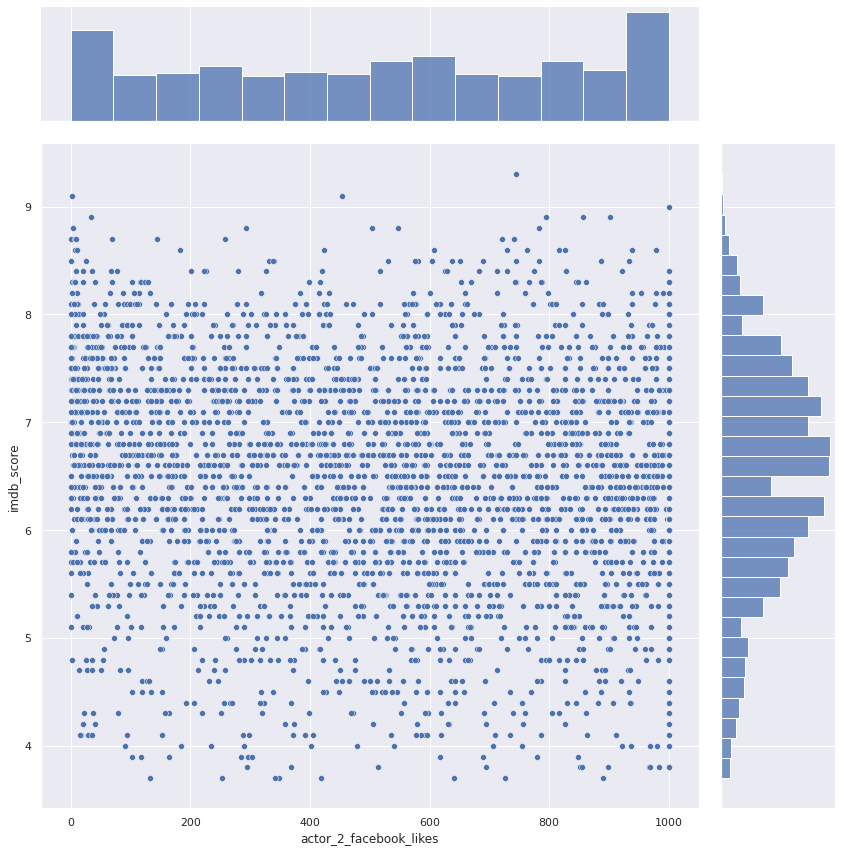

In [ ]:
actor2likesVSimdbscore=pd.concat([actor2_clean,imdb_score_clean], axis=1).reindex(imdb_score_clean.index)
newActor2likesIMDB=actor2likesVSimdbscore.dropna(axis = 0, how ='any')

sb.jointplot(data=newActor2likesIMDB,x="actor_2_facebook_likes", y="imdb_score", height =12)
newActor2likesIMDB.corr()

actor 2 likes vs gross corr value = 0.2206 <br>
actor 2 likes vs imdb corr value = -0.1050

quite a significant differential

# Multi variate EDA

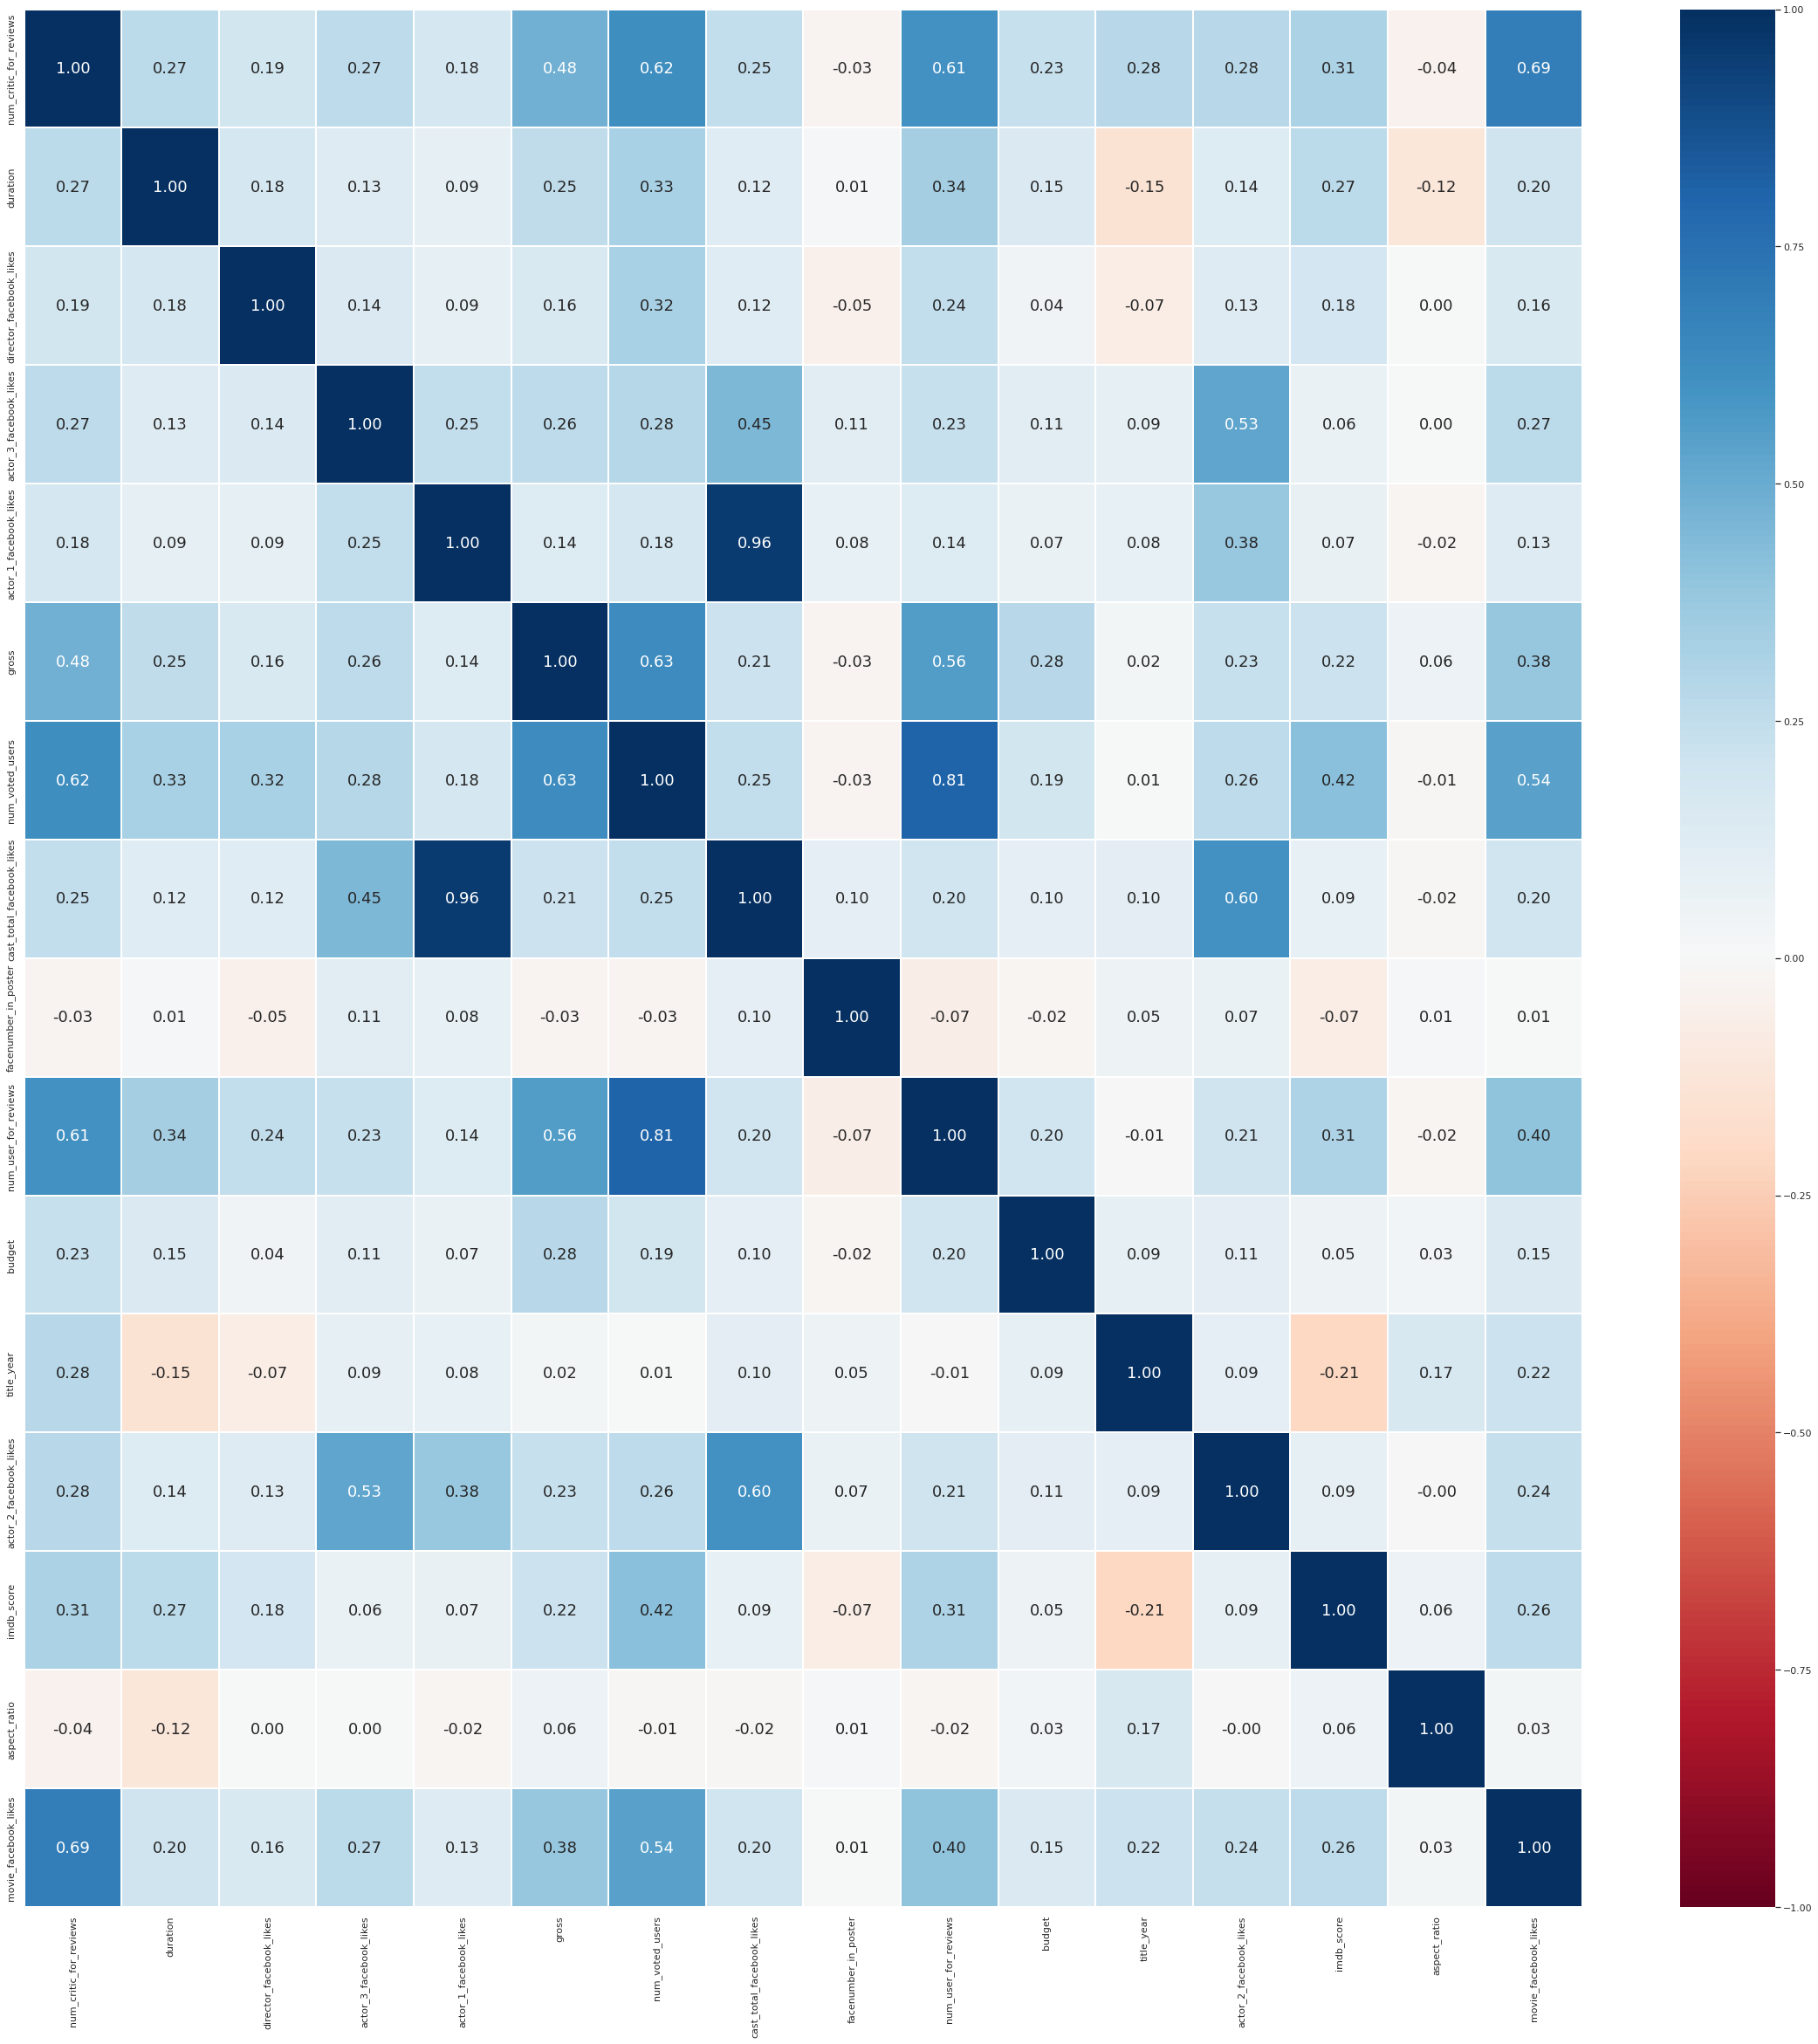

In [ ]:
# Create a new DataFrame with all the relevant variables included
New_DF = pd.DataFrame(imdb[["director_name", "num_critic_for_reviews", "duration", "director_facebook_likes", 
                            "actor_3_facebook_likes", "actor_2_name", "actor_1_facebook_likes", "gross", "genres", "actor_1_name",
                            "num_voted_users", "cast_total_facebook_likes", "actor_3_name", "facenumber_in_poster", "plot_keywords",
                            "num_user_for_reviews", "language", "country", "content_rating", "budget", "title_year", "actor_2_facebook_likes",
                            "imdb_score", "aspect_ratio", "movie_facebook_likes"]]).copy()

# Correlation Matrix
# print(New_DF.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(40, 40))
sb.heatmap(New_DF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Machine learning

## decision tree

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

# 6.5 = 1-6.5 (Bad) 10 = 6.6-10 (Good)
bins = (2, 6.5, 10)
# Classification

imdb_copy1 = imdb.copy()

imdb_res = imdb_copy1[['imdb_score']].copy()
imdb_res.fillna(imdb_res.median(), inplace = True)

group_names = ["Bad","Good"] 
imdb_res['imdb_score'] = pd.cut(imdb_res['imdb_score'], bins = bins, labels = group_names)

imdb_res.value_counts()

imdb_score
Good          1979
Bad           1948
dtype: int64

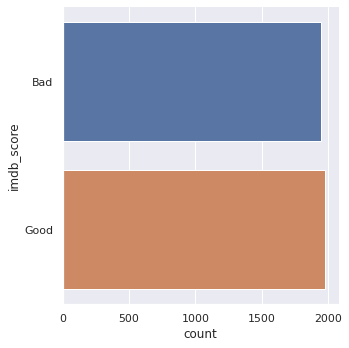

In [ ]:
sb.catplot(y = 'imdb_score', data = imdb_res, kind = "count")

In [ ]:
# cleaning the num variables
imdb_num = imdb_copy1[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'num_voted_users', 'actor_3_facebook_likes',
                 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget',
                 'movie_facebook_likes']].copy()
                 
# filling in null values with median
imdb_num.fillna(imdb_num.median(), inplace = True)

imdb_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     3933 non-null   float64
 1   duration                   3933 non-null   float64
 2   director_facebook_likes    3933 non-null   float64
 3   num_voted_users            3933 non-null   int64  
 4   actor_3_facebook_likes     3933 non-null   float64
 5   actor_1_facebook_likes     3933 non-null   float64
 6   actor_2_facebook_likes     3933 non-null   float64
 7   cast_total_facebook_likes  3933 non-null   int64  
 8   num_user_for_reviews       3933 non-null   float64
 9   budget                     3933 non-null   float64
 10  movie_facebook_likes       3933 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 338.1 KB


In [ ]:
# OneHotEncoding of categorical predictors
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe = OneHotEncoder()

imdb_cat = imdb_copy1[['facenumber_in_poster','country','content_rating']].copy()

# removing null values
imdb_cat.dropna(inplace = True, axis = 0, how = "any")

ohe.fit(imdb_cat)
imdb_cat_ohe = pd.DataFrame(ohe.transform(imdb_cat).toarray(), 
                            columns=ohe.get_feature_names(imdb_cat.columns))

# Check the encoded variables
imdb_cat_ohe.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


facenumber_in_poster_0.0  facenumber_in_poster_1.0  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       1.0   

   facenumber_in_poster_2.0  facenumber_in_poster_3.0  \
0                       0.0                       1.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   facenumber_in_poster_4.0  facenumber_in_poster_5.0  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   facenumber_in_poster_6.0  facenumber_in_poster_7.0  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   facenumber_in_poster_8.0  facenumber_in_poster_9.0  ...  \
0                       0.0                       0.0  ...   
1                       0.0                       0.0  ...   
2                       0.0                       0.0  ...   
3                       0.0                       0.0  ...   
4                       0.0                       0.0  ...   

   content_rating_PG-13  content_rating_Passed  content_rating_R  \
0                   0.0                    0.0               1.0   
1                   0.0                    0.0               1.0   
2                   1.0                    0.0               0.0   
3                   1.0                    0.0               0.0   
4                   0.0                    0.0               0.0   

   content_rating_TV-14  content_rating_TV-G  content_rating_TV-MA  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

   content_rating_TV-PG  content_rating_TV-Y7  content_rating_Unrated  \
0                   0.0                   0.0                     0.0   
1                   0.0                   0.0                     0.0   
2                   0.0                   0.0                     0.0   
3                   0.0                   0.0                     0.0   
4                   0.0                   0.0                     0.0   

   content_rating_X  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 89 columns]

In [ ]:
imdb_ohe = pd.concat([imdb_num, imdb_cat_ohe, imdb_res], 
                           sort = False, axis = 1).reindex(index=imdb_num.index)

# Check the final dataframe
imdb_ohe.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
num_voted_users              0
actor_3_facebook_likes       0
                          ... 
content_rating_TV-PG       250
content_rating_TV-Y7       250
content_rating_Unrated     250
content_rating_X           250
imdb_score                   6
Length: 101, dtype: int64

In [ ]:
imdb_ohe.dropna(inplace = True, axis = 0, how = "any")

imdb_ohe.isnull().sum()

num_critic_for_reviews     0
duration                   0
director_facebook_likes    0
num_voted_users            0
actor_3_facebook_likes     0
                          ..
content_rating_TV-PG       0
content_rating_TV-Y7       0
content_rating_Unrated     0
content_rating_X           0
imdb_score                 0
Length: 101, dtype: int64

In [ ]:
imdb_ohe.head()

num_critic_for_reviews  duration  director_facebook_likes  num_voted_users  \
0                    16.0      94.0                      9.0             1004   
1                    11.0     114.0                     19.0             7748   
2                    15.0      81.0                     15.0              268   
3                     8.0      90.0                      0.0              476   
4                    51.0      83.0                      3.0             1272   

   actor_3_facebook_likes  actor_1_facebook_likes  actor_2_facebook_likes  \
0                   200.0                   927.0                   209.0   
1                   842.0                  1000.0                   883.0   
2                    93.0                   847.0                    94.0   
3                    32.0                   502.0                   119.0   
4                   258.0                   812.0                   277.0   

   cast_total_facebook_likes  num_user_for_reviews      budget  ...  \
0                       1936                   8.0  19000000.0  ...   
1                       3688                  48.0  35000000.0  ...   
2                       1151                   6.0  19000000.0  ...   
3                        689                  18.0    350000.0  ...   
4                       1370                  15.0  19000000.0  ...   

   content_rating_Passed  content_rating_R  content_rating_TV-14  \
0                    0.0               1.0                   0.0   
1                    0.0               1.0                   0.0   
2                    0.0               0.0                   0.0   
3                    0.0               0.0                   0.0   
4                    0.0               0.0                   0.0   

   content_rating_TV-G  content_rating_TV-MA  content_rating_TV-PG  \
0                  0.0                   0.0                   0.0   
1                  0.0                   0.0                   0.0   
2                  0.0                   0.0                   0.0   
3                  0.0                   0.0                   0.0   
4                  0.0                   0.0                   0.0   

   content_rating_TV-Y7  content_rating_Unrated  content_rating_X  imdb_score  
0                   0.0                     0.0               0.0         Bad  
1                   0.0                     0.0               0.0         Bad  
2                   0.0                     0.0               0.0         Bad  
3                   0.0                     0.0               0.0         Bad  
4                   0.0                     0.0               0.0        Good  

[5 rows x 101 columns]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7252635158109486
True Positive Rate 	 	: 0.5771626297577854
False Positive Rate 	 	: 0.13168449197860962
False Negative Rate 	 	: 0.4228373702422145

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6766304347826086
True Positive Rate 	 	: 0.5569620253164557
False Positive Rate 	 	: 0.18475073313782991
False Negative Rate 	 	: 0.4430379746835443



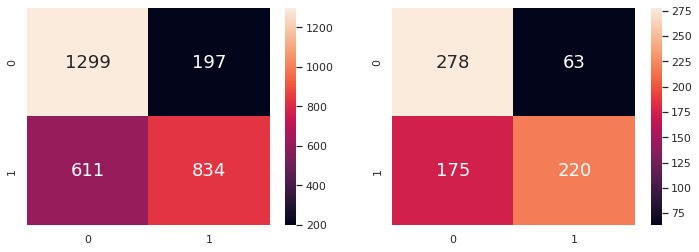

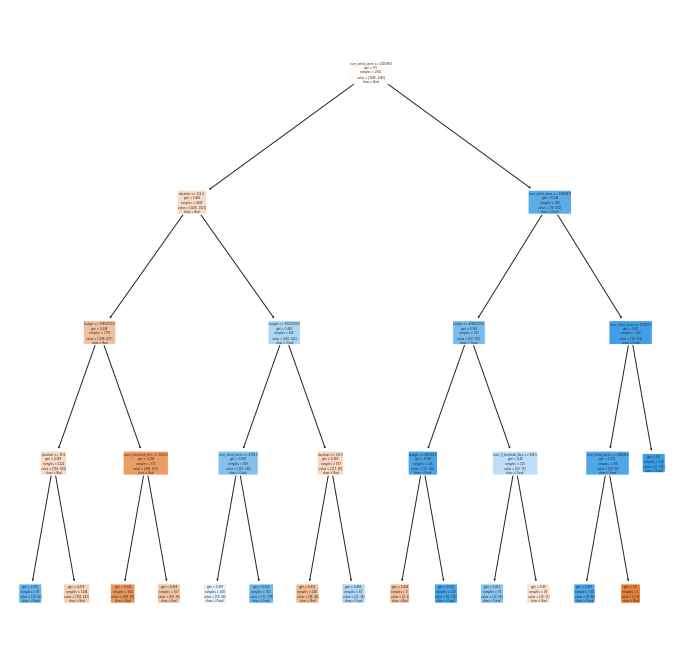

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Dataset
y = pd.DataFrame(imdb_ohe['imdb_score'])                # Response
X = pd.DataFrame(imdb_ohe.drop('imdb_score', axis = 1)) # Predictors

# Split the CA - SP Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict CA values corresponding to SP
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Bad","Good"])

# FPR AND FNR - TRAIN
CM_train = confusion_matrix(y_train, y_train_pred)
TN_train = CM_train[0][0]
FN_train = CM_train[1][0] 
TP_train = CM_train[1][1]
FP_train = CM_train[0][1]

# FPR AND FNR - TEST
CM_test = confusion_matrix(y_test, y_test_pred)
TN_test = CM_test[0][0]
FN_test = CM_test[1][0] 
TP_test = CM_test[1][1]
FP_test = CM_test[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t \t:", TP_train/(TP_train + FN_train))
print("False Positive Rate \t \t:", FP_train/(FP_train + TN_train))
print("False Negative Rate \t \t:", FN_train/(FN_train + TP_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t \t:", TP_test/(TP_test + FN_test))
print("False Positive Rate \t \t:", FP_test/(FP_test + TN_test))
print("False Negative Rate \t \t:", FN_test/(FN_test + TP_test))
print()

In [ ]:
# cross-validation

# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Extract Response and Predictors
y = pd.DataFrame(imdb_ohe['imdb_score'])
X = pd.DataFrame(imdb_ohe.drop('imdb_score', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Define the Hyper-parameter Grid to search on, in case of Decision Forest
param_grid = {# 'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(DecisionTreeClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.imdb_score.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

DecisionTreeClassifier(max_depth=6)
0.7143711814097455


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6701570680628273
True Positive Rate 	 	: 0.0
False Positive Rate 	 	: 0.0
False Negative Rate 	 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6792189679218968
True Positive Rate 	 	: 0.0
False Positive Rate 	 	: 0.0
False Negative Rate 	 	: 1.0



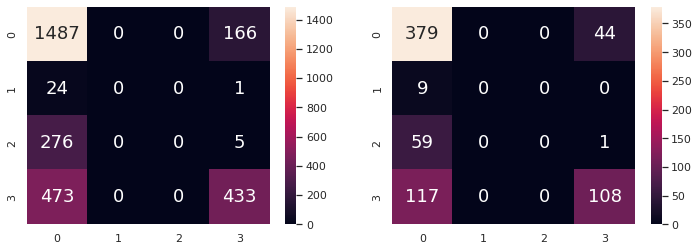

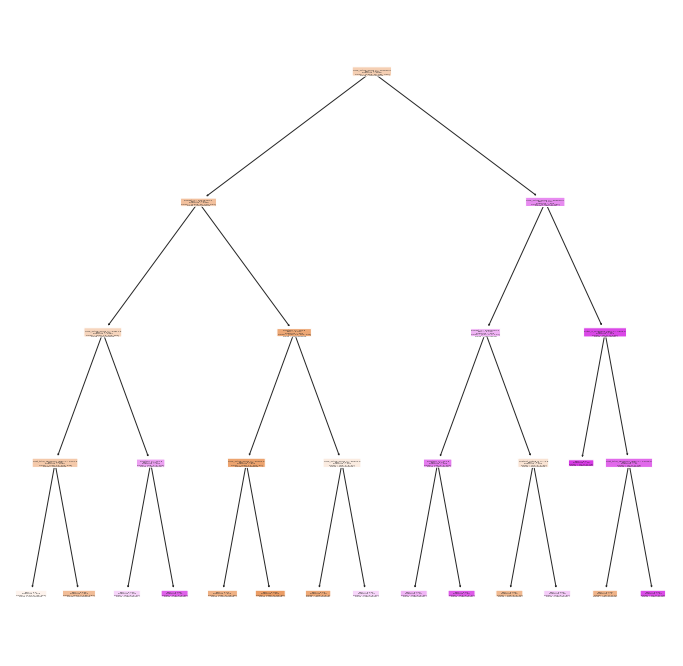

In [ ]:
# trying multi class response
imdb_bins = [0, 3, 5, 7, 10]
imdb_labels = ["horrendous", "ok", "good", "very good"]

imdb_copy3 = imdb.copy()

imdb_res3 = imdb_copy3[['imdb_score']]
imdb_res3.fillna(imdb_res.median(), inplace = True)

imdb_res3['imdb_score'] = pd.cut(imdb_res3['imdb_score'], bins = imdb_bins, labels = imdb_labels)

# cleaning the num variables
imdb_num3 = imdb_copy3[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'num_voted_users', 'actor_3_facebook_likes',
                 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget',
                 'movie_facebook_likes']].copy()
                 
# filling in null values with median
imdb_num3.fillna(imdb_num3.median(), inplace = True)

imdb_cat3 = imdb_copy3[['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'actor_3_name',
                       'plot_keywords', 'content_rating','title_year']].copy()

# converting title year to cat variable
imdb_cat3['title_year'] = pd.cut(imdb_cat3['title_year'], bins=[1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
                                labels=['1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990',
                                        '1990-2000', '2000-2010', '2010-2020'])

# removing null values
imdb_cat3.dropna(inplace = True, axis = 0, how = "any")

ohe.fit(imdb_cat3)
imdb_cat3_ohe = pd.DataFrame(ohe.transform(imdb_cat3).toarray(), 
                            columns=ohe.get_feature_names(imdb_cat3.columns))

imdb_ohe3 = pd.concat([imdb_num3, imdb_cat3_ohe, imdb_res3], 
                      sort = False, axis = 1).reindex(index=imdb_num3.index)

imdb_ohe3.dropna(inplace = True, axis = 0, how = "any")

# imdb_ohe3.head() for checking

# Dataset
y = pd.DataFrame(imdb_ohe3['imdb_score'])                # Response
X = pd.DataFrame(imdb_ohe3.drop('imdb_score', axis = 1)) # Predictors

# Split the CA - SP Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict CA values corresponding to SP
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["horrendous", "ok", "good", "very good"])

# FPR AND FNR - TRAIN
CM_train = confusion_matrix(y_train, y_train_pred)
TN_train = CM_train[0][0]
FN_train = CM_train[1][0] 
TP_train = CM_train[1][1]
FP_train = CM_train[0][1]

# FPR AND FNR - TEST
CM_test = confusion_matrix(y_test, y_test_pred)
TN_test = CM_test[0][0]
FN_test = CM_test[1][0] 
TP_test = CM_test[1][1]
FP_test = CM_test[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t \t:", TP_train/(TP_train + FN_train))
print("False Positive Rate \t \t:", FP_train/(FP_train + TN_train))
print("False Negative Rate \t \t:", FN_train/(FN_train + TP_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t \t:", TP_test/(TP_test + FN_test))
print("False Positive Rate \t \t:", FP_test/(FP_test + TN_test))
print("False Negative Rate \t \t:", FN_test/(FN_test + TP_test))
print()

In [ ]:
# multi class response cross validation

# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Extract Response and Predictors
y = pd.DataFrame(imdb_ohe3['imdb_score'])
X = pd.DataFrame(imdb_ohe3.drop('imdb_score', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Define the Hyper-parameter Grid to search on, in case of Decision Forest
param_grid = {# 'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(DecisionTreeClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.imdb_score.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

DecisionTreeClassifier(max_depth=3)
0.6691099476439791


Observation: the accuracy is better using binary class response, I suspect this is because for the multi class response, the classes are heavily distorted. In my opinion, balancing the classes is not ideal as clearly majority of the movies lie within the 'good' and 'very good' range, so I believe it will be better to stick to binary class response for this dataset.

## K MODES

In [ ]:
imdb_copy2 = imdb.copy()
imdb_catt = imdb_copy2[['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'actor_3_name',
                 'plot_keywords', 'content_rating','title_year', 'imdb_score']].copy()
imdb_catt.head()

director_name      actor_2_name                         genres  \
0      David Raynr     Deon Richmond                         Comedy   
1    Colin Higgins      Barry Corbin                 Comedy|Musical   
2     Eric England       Ace Marrero  Drama|Horror|Mystery|Thriller   
3      Babar Ahmed  Alexander Wraith                Action|Thriller   
4  Paul Fierlinger      Peter Gerety                Animation|Drama   

          actor_1_name        actor_3_name  \
0        Donald Faison     Countess Vaughn   
1         Dolly Parton         Dom DeLuise   
2     Jack E. Curenton  Alan Pietruszewski   
3              Lalaine     Darren Kendrick   
4  Isabella Rossellini       Lynn Redgrave   

                                       plot_keywords content_rating  \
0  apostrophe in title|bare breasts|female nudity...              R   
1         chicken|governor|locker room|sheriff|texas              R   
2  dog|gun|hostage|husband wife relationship|jeal...            NaN   
3  assassin|female assassin|kingdom|martial arts|...          PG-13   
4  autobiography|dog movie|german shepherd|memoir...            NaN   

   title_year  imdb_score  
0      1999.0         5.2  
1      1982.0         5.8  
2      2013.0         4.1  
3      2009.0         3.2  
4      2009.0         6.9

In [ ]:
# cleaning null values
imdb_catt.fillna(imdb_catt.median(), inplace = True)
imdb_catt.dropna(inplace = True, axis = 0, how = "any")

imdb_catt.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


director_name     0
actor_2_name      0
genres            0
actor_1_name      0
actor_3_name      0
plot_keywords     0
content_rating    0
title_year        0
imdb_score        0
dtype: int64

In [ ]:
# converting imdb and title year into cat variable
imdb_catt['imdb_score'] = pd.cut(imdb_catt['imdb_score'], bins=(2, 6.5, 10), 
                                 labels=['Bad', 'Good'])

imdb_catt['title_year'] = pd.cut(imdb_catt['title_year'], bins=[1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
                                 labels=['1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990',
                                         '1990-2000', '2000-2010', '2010-2020'])

imdb_catt.head()

director_name      actor_2_name  \
0      David Raynr     Deon Richmond   
1    Colin Higgins      Barry Corbin   
3      Babar Ahmed  Alexander Wraith   
5  Nick Cassavetes    Kevin Connolly   
6     Mark Osborne      James Franco   

                                     genres   actor_1_name     actor_3_name  \
0                                    Comedy  Donald Faison  Countess Vaughn   
1                            Comedy|Musical   Dolly Parton      Dom DeLuise   
3                           Action|Thriller        Lalaine  Darren Kendrick   
5                             Drama|Romance   Ryan Gosling    Gena Rowlands   
6  Adventure|Animation|Drama|Family|Fantasy   Jeff Bridges    Mackenzie Foy   

                                       plot_keywords content_rating  \
0  apostrophe in title|bare breasts|female nudity...              R   
1         chicken|governor|locker room|sheriff|texas              R   
3  assassin|female assassin|kingdom|martial arts|...          PG-13   
5  class differences|letter|nursing home|second c...          PG-13   
6  aviator|based on book|girl|little girl|the lit...             PG   

  title_year imdb_score  
0  1990-2000        Bad  
1  1980-1990        Bad  
3  2000-2010        Bad  
5  2000-2010       Good  
6  2010-2020       Good

In [ ]:
imdb_catt_copy = imdb_catt.copy()

In [ ]:
imdb_catt = imdb_catt.apply(le.fit_transform)
imdb_catt.head()

director_name  actor_2_name  genres  actor_1_name  actor_3_name  \
0            396           560     455           400           516   
1            297           179     554           391           665   
3            125            70     227           881           576   
5           1269          1217     682          1314           867   
6           1106           927     258           667          1595   

   plot_keywords  content_rating  title_year  imdb_score  
0            772               9           7           0  
1           2114               9           6           0  
3            923               7           8           0  
5           2245               7           8           1  
6           1020               6           9           1

In [ ]:
!pip install --upgrade kmodes
from kmodes.kmodes import KModes

# using k modes with cao initialisation
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(imdb_catt)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 25208.0
Run 1, iteration: 2/100, moves: 0, cost: 25208.0


In [ ]:
# Predicted Clusters
fitClusters_cao

array([1, 0, 1, ..., 1, 1, 0], dtype=uint16)

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = imdb_catt.columns

In [ ]:
# Mode of the clusters
clusterCentroidsDf

director_name  actor_2_name  genres  actor_1_name  actor_3_name  \
0           1655          1586     616          1276          1250   
1            420            22     455          1422          2387   

   plot_keywords  content_rating  title_year  imdb_score  
0           3537               9           8           1  
1              0               7           8           0

In [ ]:
# using k modes with huang initialisation
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(imdb_catt)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 823, cost: 25212.0
Run 1, iteration: 2/100, moves: 40, cost: 25206.0
Run 1, iteration: 3/100, moves: 2, cost: 25206.0


In [ ]:
# Predicted clusters
fitClusters_huang

array([1, 0, 1, ..., 1, 1, 0], dtype=uint16)

In [ ]:
# choosing k by comparing cost against each k
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(imdb_catt)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 26978.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 25208.0
Run 1, iteration: 2/100, moves: 0, cost: 25208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35, cost: 24461.0
Run 1, iteration: 2/100, moves: 3, cost: 24461.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 71, cost: 23959.0
Run 1, iteration: 2/100, moves: 3, cost: 23959.0


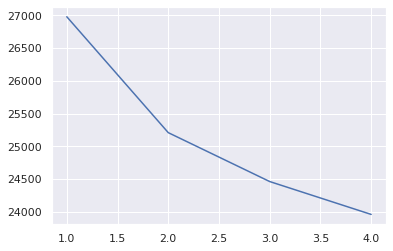

In [ ]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [ ]:
# choosing k as 3
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(imdb_catt)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35, cost: 24461.0
Run 1, iteration: 2/100, moves: 3, cost: 24461.0


In [ ]:
fitClusters_cao

array([1, 2, 1, ..., 1, 1, 0], dtype=uint16)

In [ ]:
# combining predicted clusters with original dataframe
imdb_catt = imdb_catt_copy.reset_index()

clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([imdb_catt, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

combinedDf.head()

director_name      actor_2_name  \
0      David Raynr     Deon Richmond   
1    Colin Higgins      Barry Corbin   
2      Babar Ahmed  Alexander Wraith   
3  Nick Cassavetes    Kevin Connolly   
4     Mark Osborne      James Franco   

                                     genres   actor_1_name     actor_3_name  \
0                                    Comedy  Donald Faison  Countess Vaughn   
1                            Comedy|Musical   Dolly Parton      Dom DeLuise   
2                           Action|Thriller        Lalaine  Darren Kendrick   
3                             Drama|Romance   Ryan Gosling    Gena Rowlands   
4  Adventure|Animation|Drama|Family|Fantasy   Jeff Bridges    Mackenzie Foy   

                                       plot_keywords content_rating  \
0  apostrophe in title|bare breasts|female nudity...              R   
1         chicken|governor|locker room|sheriff|texas              R   
2  assassin|female assassin|kingdom|martial arts|...          PG-13   
3  class differences|letter|nursing home|second c...          PG-13   
4  aviator|based on book|girl|little girl|the lit...             PG   

  title_year imdb_score  cluster_predicted  
0  1990-2000        Bad                  1  
1  1980-1990        Bad                  2  
2  2000-2010        Bad                  1  
3  2000-2010       Good                  0  
4  2010-2020       Good                  0

In [ ]:
# cluster identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 3 to 3581
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   director_name      1824 non-null   object  
 1   actor_2_name       1824 non-null   object  
 2   genres             1824 non-null   object  
 3   actor_1_name       1824 non-null   object  
 4   actor_3_name       1824 non-null   object  
 5   plot_keywords      1824 non-null   object  
 6   content_rating     1824 non-null   object  
 7   title_year         1824 non-null   category
 8   imdb_score         1820 non-null   category
 9   cluster_predicted  1824 non-null   uint16  
dtypes: category(2), object(7), uint16(1)
memory usage: 121.6+ KB


In [ ]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 3580
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   director_name      1067 non-null   object  
 1   actor_2_name       1067 non-null   object  
 2   genres             1067 non-null   object  
 3   actor_1_name       1067 non-null   object  
 4   actor_3_name       1067 non-null   object  
 5   plot_keywords      1067 non-null   object  
 6   content_rating     1067 non-null   object  
 7   title_year         1067 non-null   category
 8   imdb_score         1065 non-null   category
 9   cluster_predicted  1067 non-null   uint16  
dtypes: category(2), object(7), uint16(1)
memory usage: 71.3+ KB


In [ ]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 1 to 3578
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   director_name      691 non-null    object  
 1   actor_2_name       691 non-null    object  
 2   genres             691 non-null    object  
 3   actor_1_name       691 non-null    object  
 4   actor_3_name       691 non-null    object  
 5   plot_keywords      691 non-null    object  
 6   content_rating     691 non-null    object  
 7   title_year         691 non-null    category
 8   imdb_score         691 non-null    category
 9   cluster_predicted  691 non-null    uint16  
dtypes: category(2), object(7), uint16(1)
memory usage: 46.4+ KB


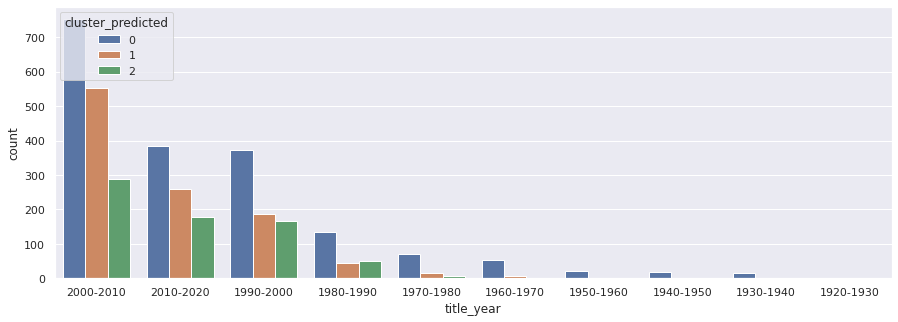

In [ ]:
# title_year
plt.subplots(figsize = (15, 5))
sb.countplot(x=combinedDf['title_year'],order=combinedDf['title_year'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

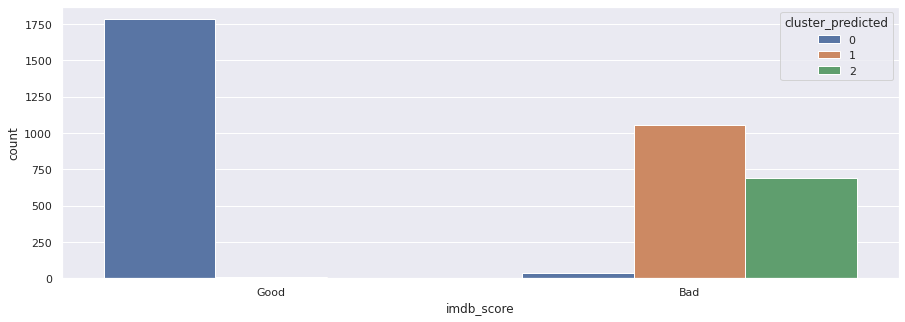

In [ ]:
# imdb_score
plt.subplots(figsize = (15, 5))
sb.countplot(x=combinedDf['imdb_score'],order=combinedDf['imdb_score'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

## K MEANS

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5)

imdb_copy4 = imdb.copy()

df1 = pd.DataFrame(imdb_copy4[["director_facebook_likes", "cast_total_facebook_likes"]])
df2 = pd.DataFrame(imdb_copy4[["director_facebook_likes", "movie_facebook_likes"]])
df3 = pd.DataFrame(imdb_copy4[["movie_facebook_likes", "cast_total_facebook_likes"]])

df1 = df1.fillna(df1.median())
df2 = df2.fillna(df2.median())
df3 = df3.fillna(df3.median())

# df1.isnull().sum() for checking

In [ ]:
# DF1
km1 = model.fit(df1)

In [ ]:
model.cluster_centers_

array([[3.61196093e+02, 2.45655499e+03],
       [2.39328500e+03, 5.14575850e+04],
       [2.85000000e+02, 6.56730000e+05],
       [9.30000000e+01, 2.78264500e+05],
       [1.35326037e+03, 1.96028268e+04]])

In [ ]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df1['cluster'] = model.labels_
df1.head()

director_facebook_likes  cast_total_facebook_likes  cluster
0                      9.0                       1936        0
1                     19.0                       3688        0
2                     15.0                       1151        0
3                      0.0                        689        0
4                      3.0                       1370        0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


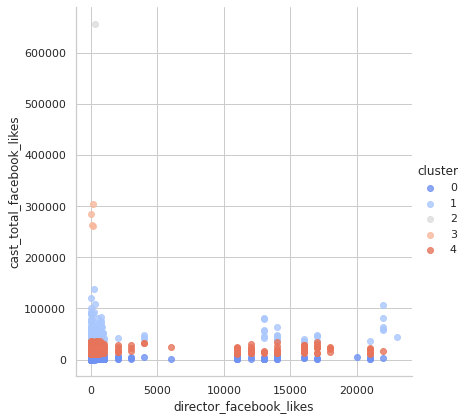

In [ ]:
sb.set_style('whitegrid')
sb.lmplot('director_facebook_likes', 'cast_total_facebook_likes', data = df1, hue = 'cluster', palette = 'coolwarm', size = 6, aspect = 1, fit_reg = False)
plt.show()

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df1.index.values
cluster_map['cluster'] = km1.labels_

cluster_map.head()

data_index  cluster
0           0        0
1           1        0
2           2        0
3           3        0
4           4        0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


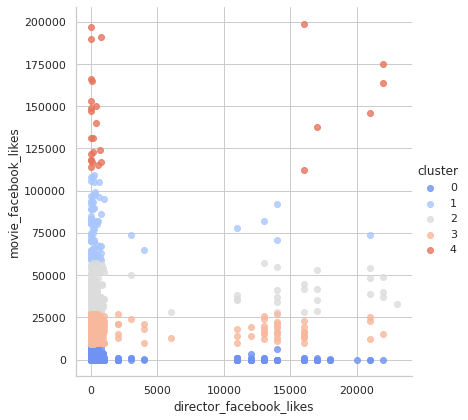

In [ ]:
# DF2
model.fit(df2)
model.cluster_centers_
model.labels_
df2['cluster'] = model.labels_

sb.set_style('whitegrid')
sb.lmplot('director_facebook_likes', 'movie_facebook_likes', data = df2, hue = 'cluster', palette = 'coolwarm', size = 6, aspect = 1, fit_reg = False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


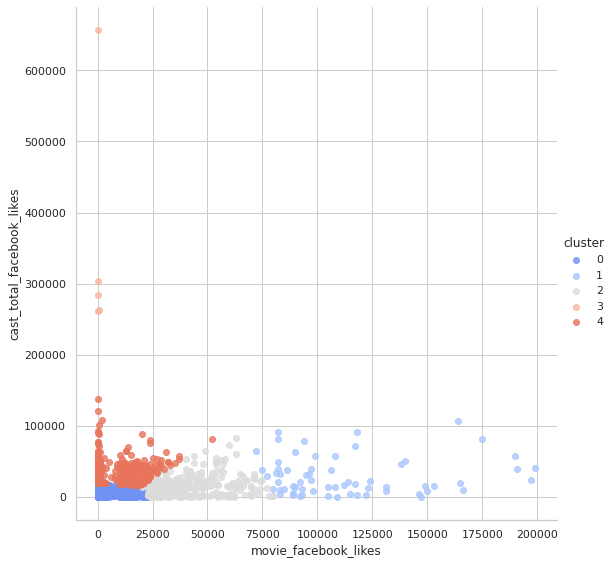

In [ ]:
# DF3
model.fit(df3)
model.cluster_centers_
model.labels_
df3['cluster'] = model.labels_

sb.set_style('whitegrid')
sb.lmplot('movie_facebook_likes', 'cast_total_facebook_likes', data = df3, hue = 'cluster', palette = 'coolwarm', size = 8, aspect = 1, fit_reg = False)
plt.show()

In [ ]:
# trying 3d visualisation

import matplotlib.patches as patches
import plotly.express as px

avgIMDB= 6.6
highIMDB = imdb_copy4[imdb_copy4["imdb_score"] >= avgIMDB] 
lowIMDB = imdb_copy4[imdb_copy4["imdb_score"] < avgIMDB]

hfig = px.scatter_3d( highIMDB, x="imdb_score", y="director_facebook_likes", z="movie_facebook_likes", 
                    color = "imdb_score", size_max = 50, 
                    hover_name="movie_title") 
                     
hfig.show()

In [ ]:
lfig = px.scatter_3d( lowIMDB, x="imdb_score", y="director_facebook_likes", z="movie_facebook_likes", 
                    color = "imdb_score", size_max = 50, 
                    hover_name="movie_title" ) 
                     
lfig.show()

## Multi variate K means

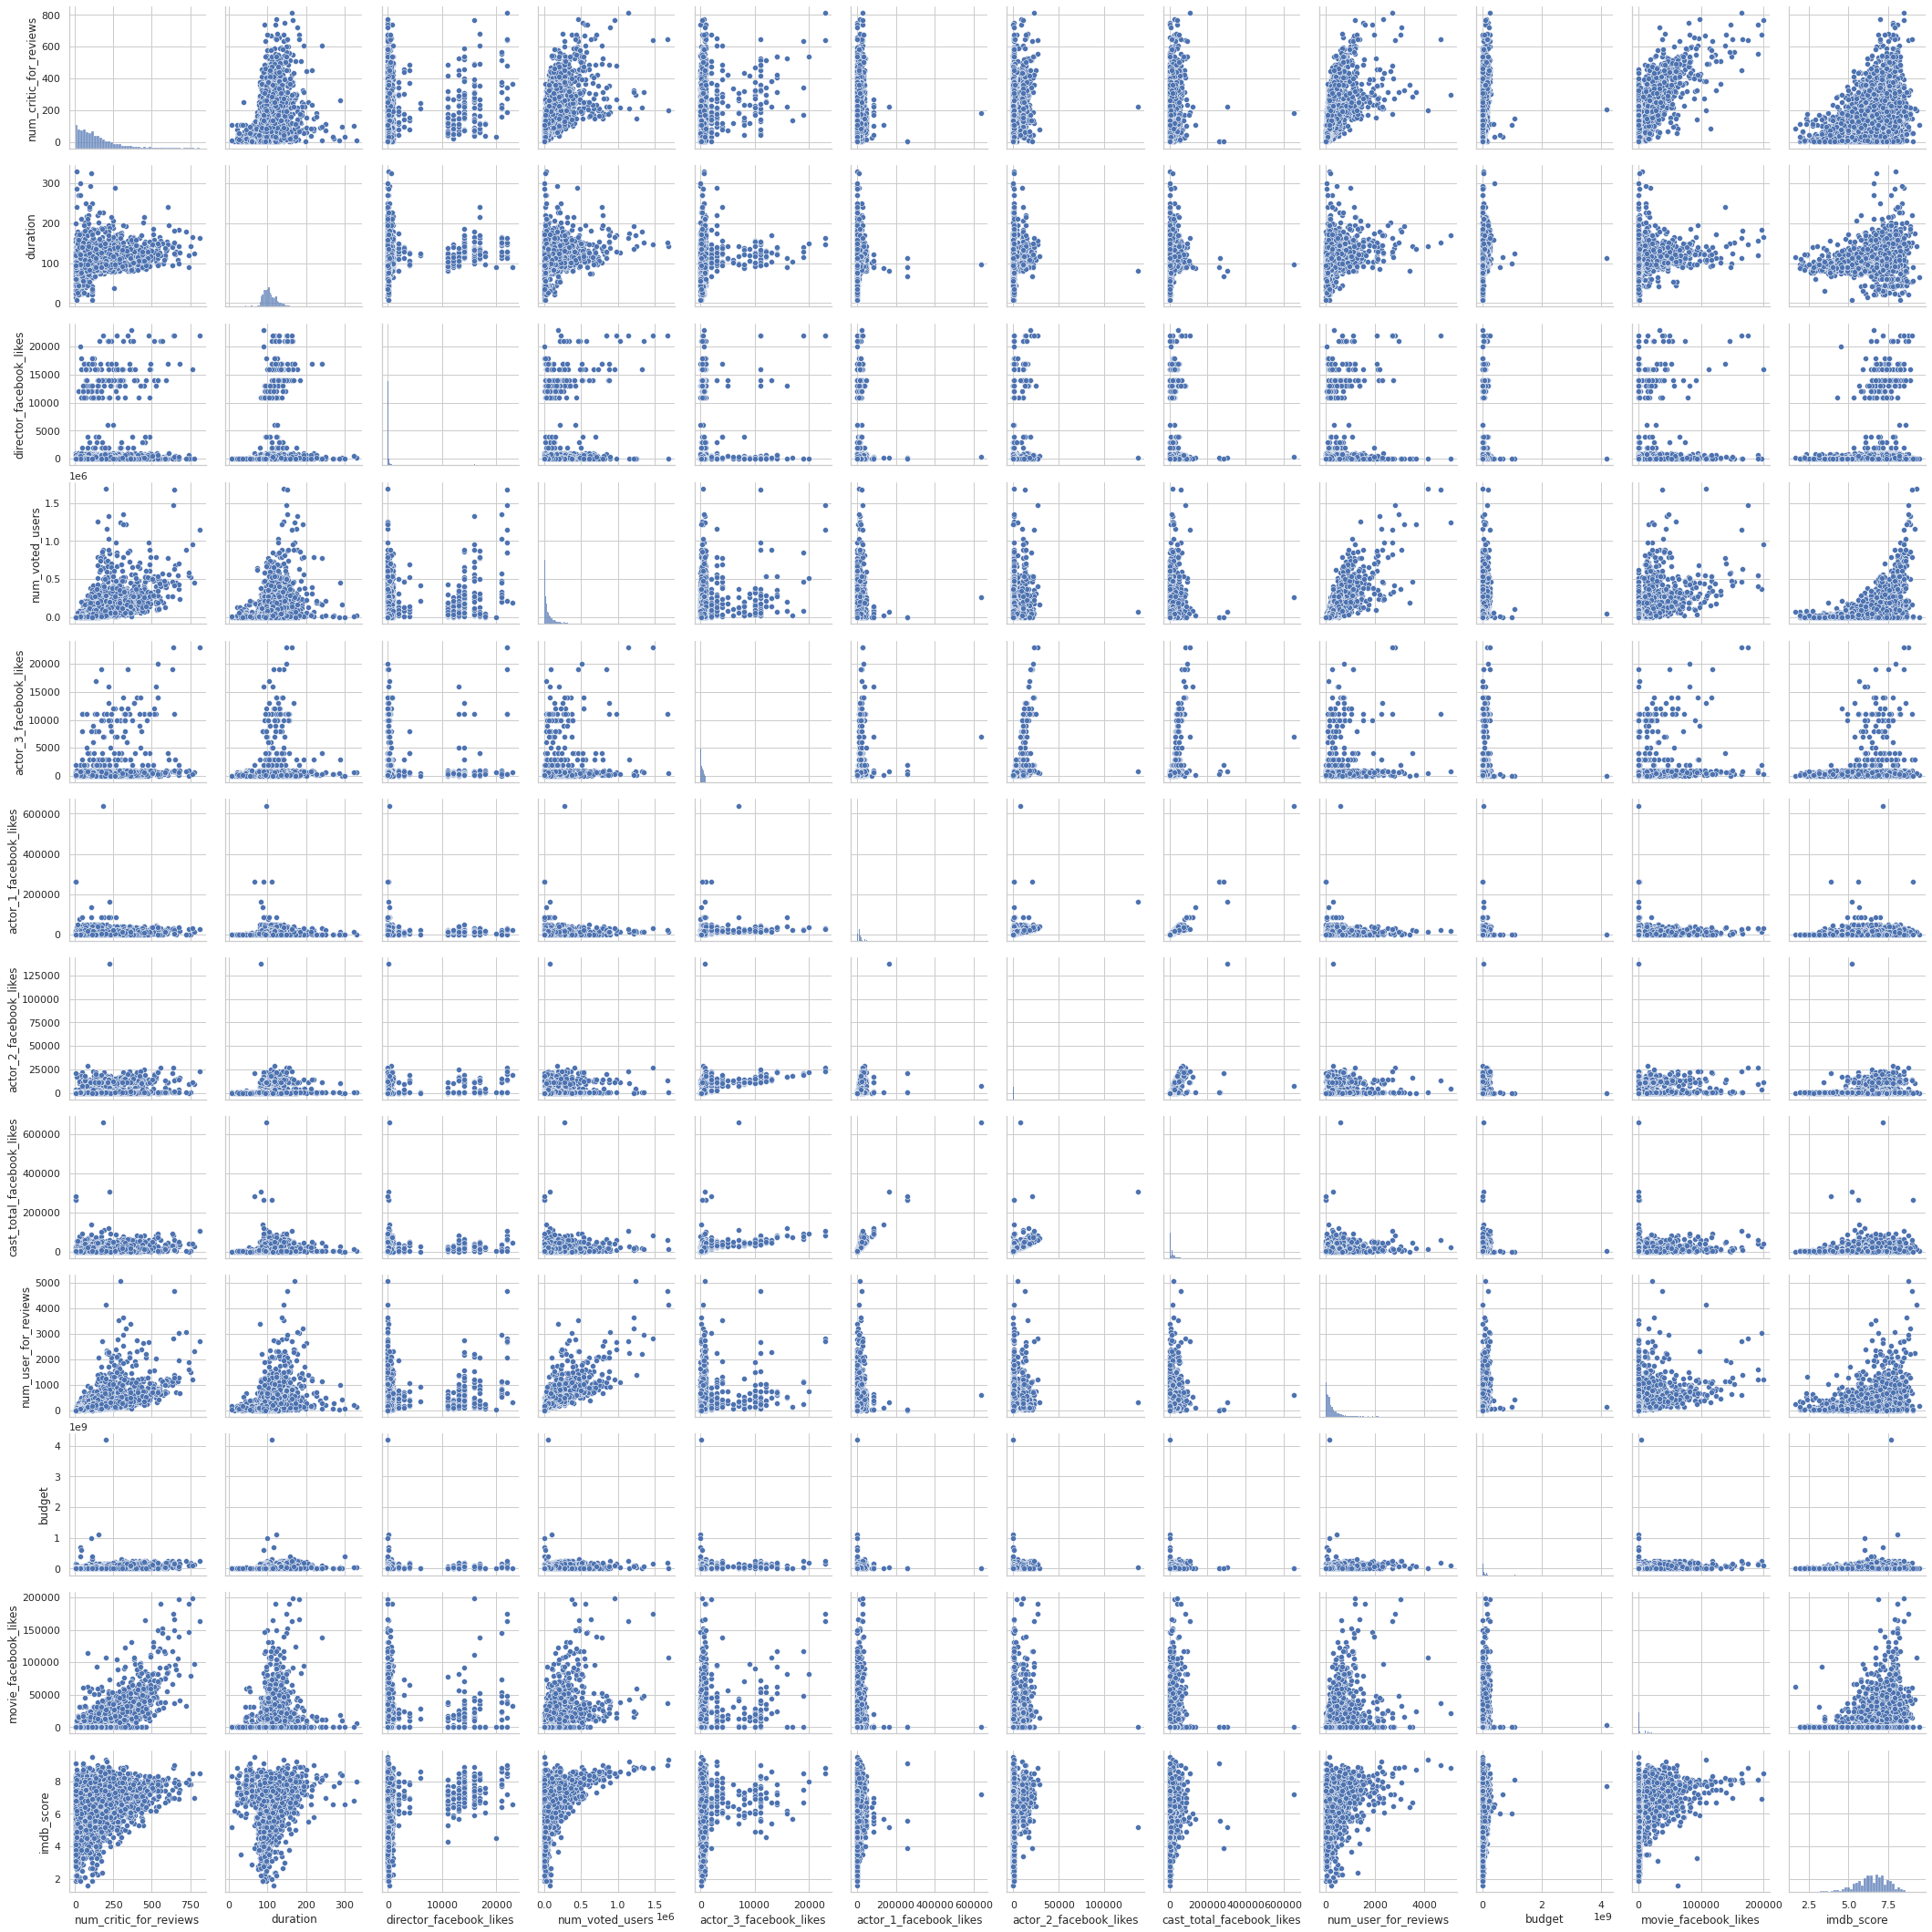

In [ ]:
imdb_numk = imdb_copy1[["num_critic_for_reviews", "duration", "director_facebook_likes", "num_voted_users",
                        "actor_3_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes", 
                        "cast_total_facebook_likes", "num_user_for_reviews", "budget",
                        "movie_facebook_likes", "imdb_score"]].copy()

# filling in null values with median
imdb_numk.fillna(imdb_numk.median(), inplace = True)

# remove remaining null
imdb_numk.dropna(inplace = True, axis = 0, how = "any")

# Plot the Raw Data on 2D grids
sb.pairplot(imdb_numk)

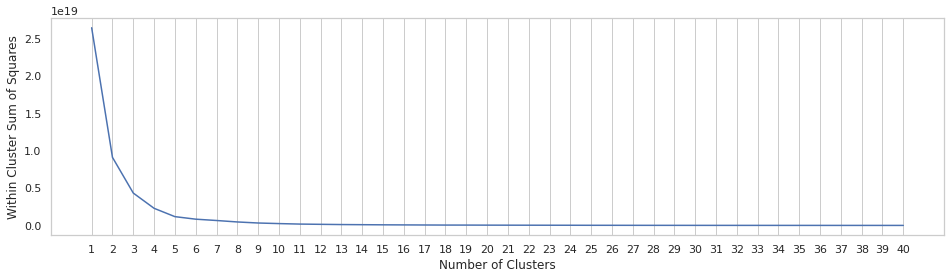

In [ ]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(imdb_numk)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [ ]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 5
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(imdb_numk)

KMeans(n_clusters=5, n_init=20)

Features 	critic_reviews 		duration 		director_likes 		voted_users 		actor3_likes 		actor2_likes 		actor1_likes 		cast_total_likes 		user_reviews 		budget 		movie_likes 		imdb_score

Cluster 0:	113.02	 	 	103.6	 	 	519.07	 	 	55842.64	 	 	452.64	 	 	5222.08	 	 	1136.11	 	 	7494.66	 	 	193.76	 	 	14037666.67	 	 	4994.11	 	 	6.43	 	 	
Cluster 1:	202.0	 	 	112.0	 	 	0.0	 	 	53508.0	 	 	38.0	 	 	717.0	 	 	126.0	 	 	907.0	 	 	131.0	 	 	4200000000.0	 	 	4000.0	 	 	7.7	 	 	
Cluster 2:	83.25	 	 	107.0	 	 	73.5	 	 	30921.75	 	 	78.5	 	 	246.0	 	 	111.5	 	 	572.0	 	 	179.0	 	 	850000000.0	 	 	219.5	 	 	6.82	 	 	
Cluster 3:	336.36	 	 	126.97	 	 	1401.1	 	 	284255.98	 	 	2049.76	 	 	13520.19	 	 	5014.07	 	 	22593.21	 	 	848.75	 	 	165528643.22	 	 	30192.23	 	 	6.83	 	 	
Cluster 4:	181.86	 	 	114.78	 	 	1224.9	 	 	135045.98	 	 	880.79	 	 	9614.69	 	 	2509.58	 	 	14088.6	 	 	395.2	 	 	63005982.59	 	 	10735.2	 	 	6.36	 	 	

Within Cluster Sum of Squares : 1.181678418417224e+18



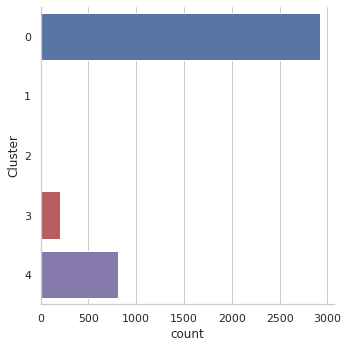

In [ ]:
# Print the Cluster Centers
print("Features", "\tcritic_reviews", "\t\tduration", "\t\tdirector_likes", "\t\tvoted_users",
      "\t\tactor3_likes", "\t\tactor2_likes", "\t\tactor1_likes", "\t\tcast_total_likes",
      "\t\tuser_reviews", "\t\tbudget", "\t\tmovie_likes", "\t\timdb_score")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t \t \t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(imdb_numk)

# Append Labels to the Data
imdb_numk_labeled = imdb_numk.copy()
imdb_numk_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = imdb_numk_labeled, kind = "count")

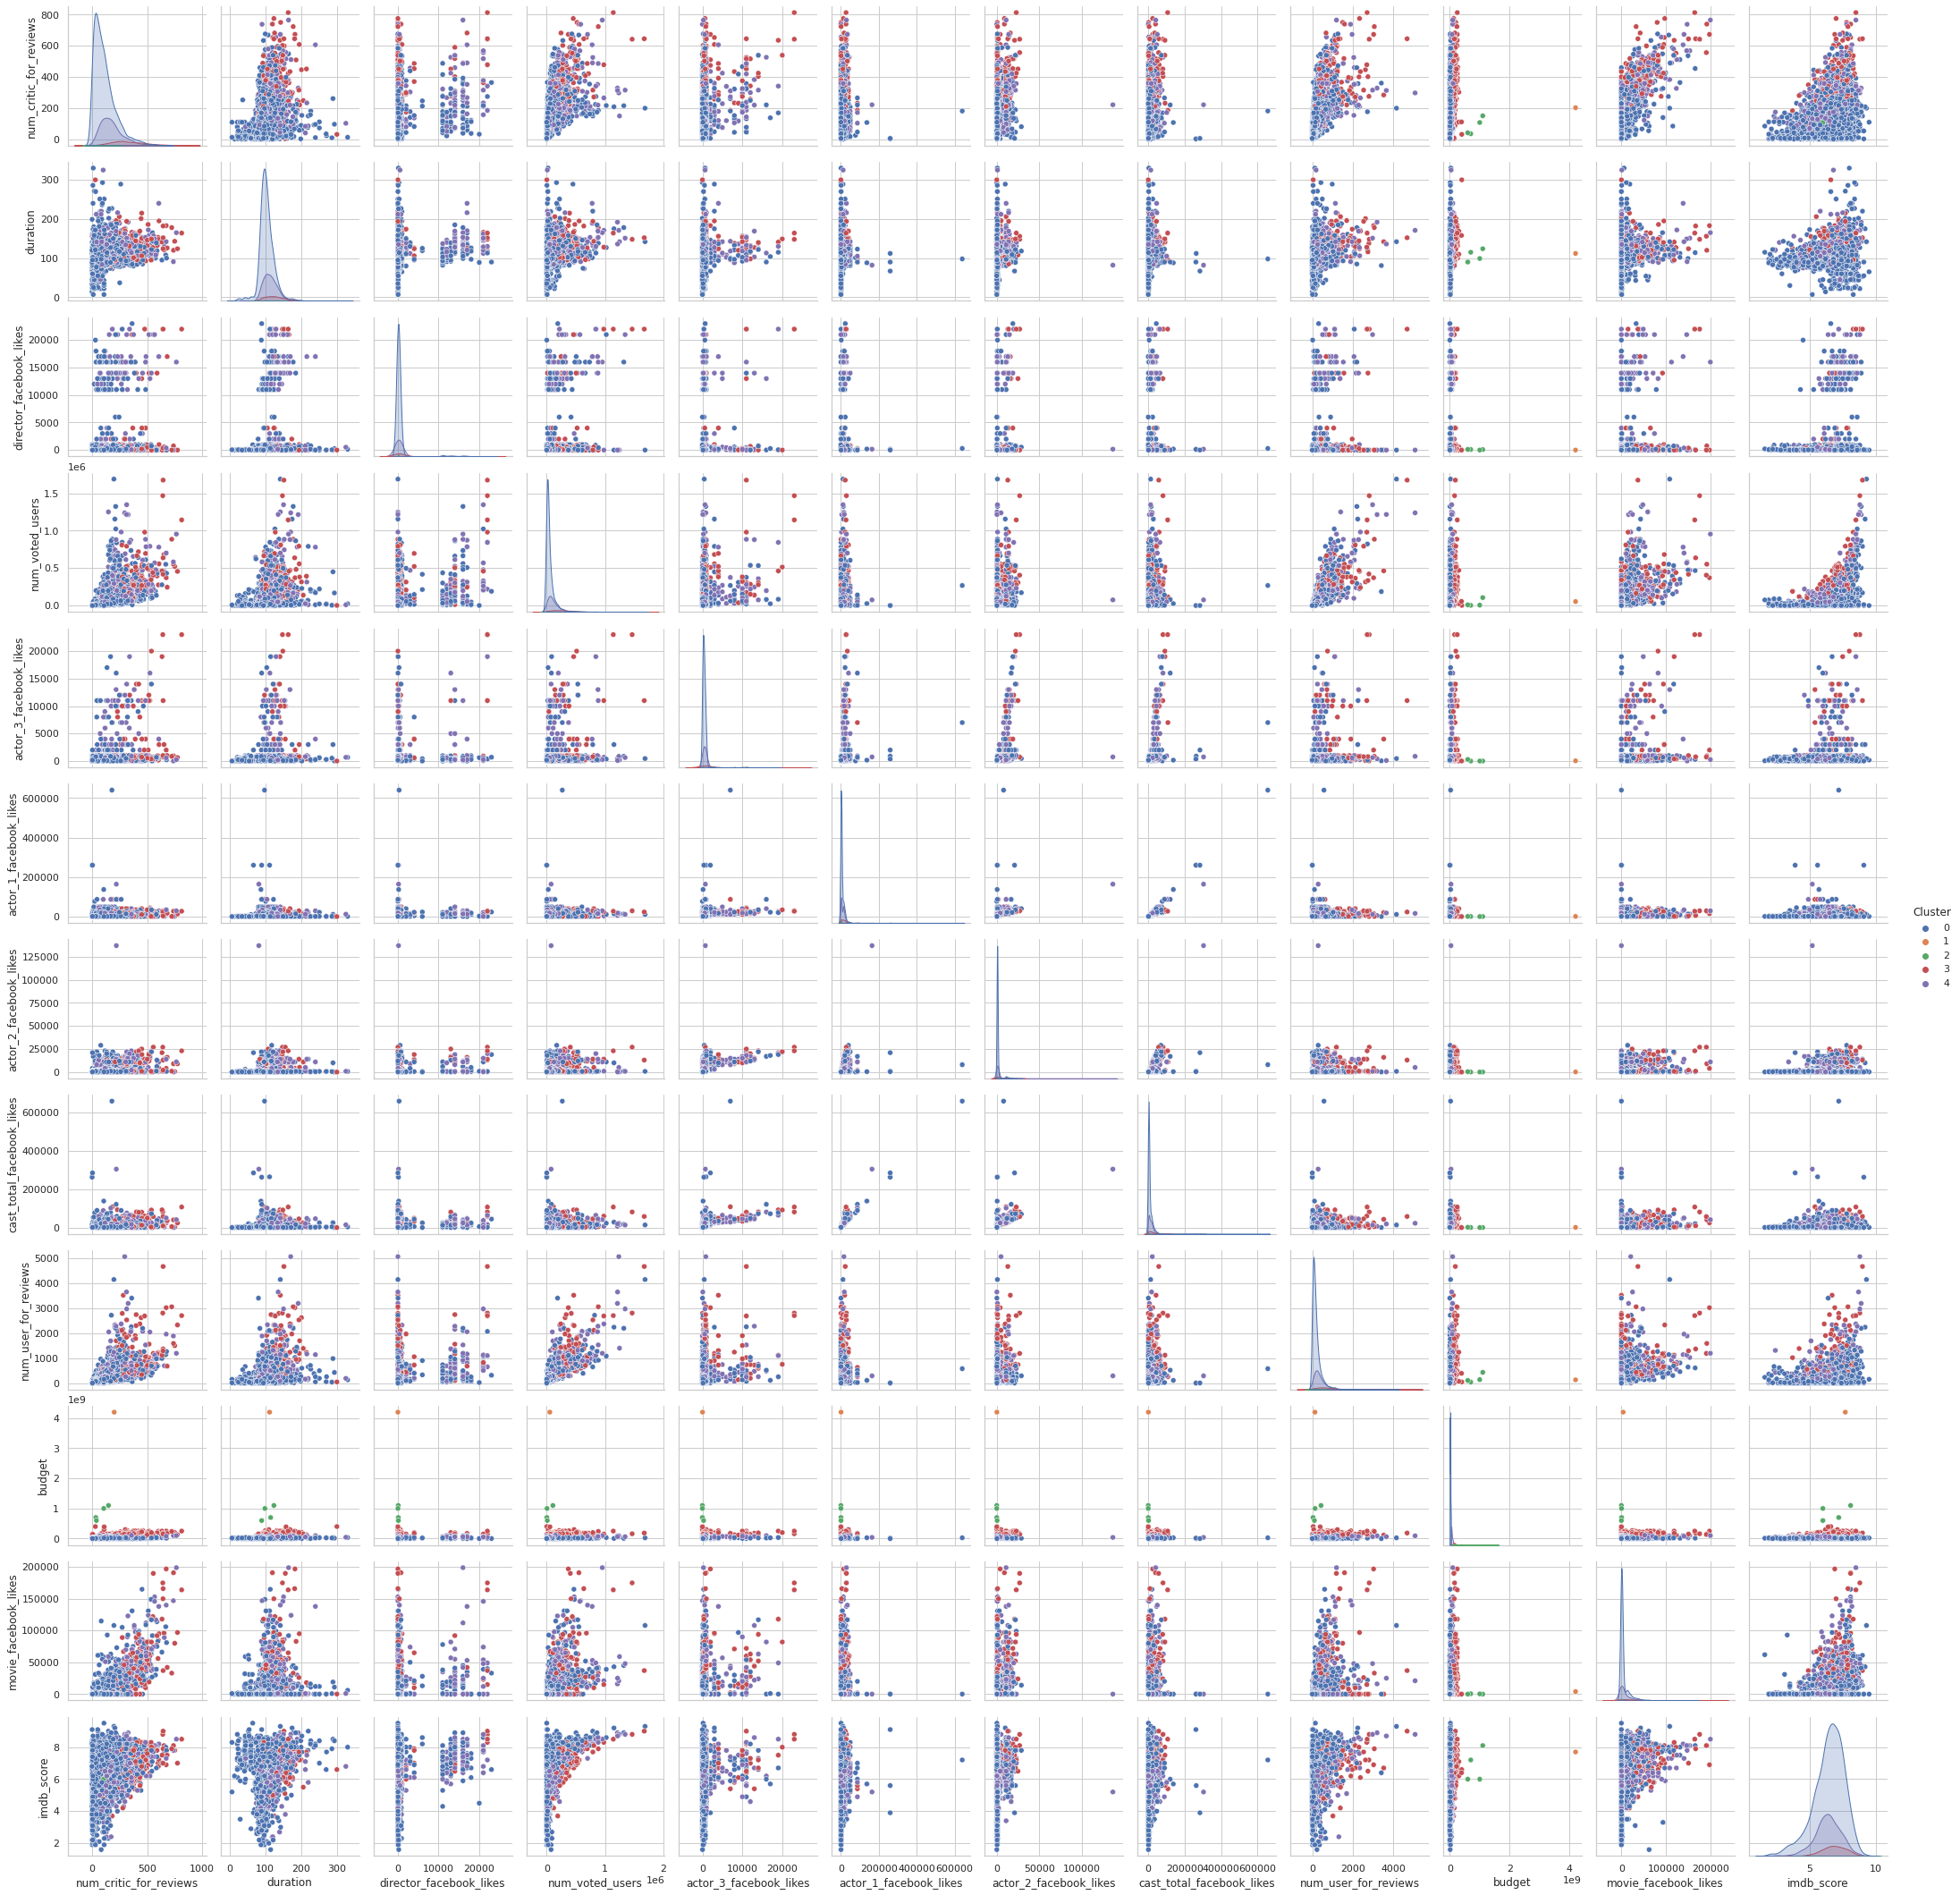

In [ ]:
# Plot the Clusters on 2D grids
sb.pairplot(imdb_numk_labeled, vars = imdb_numk.columns.values, hue = "Cluster")

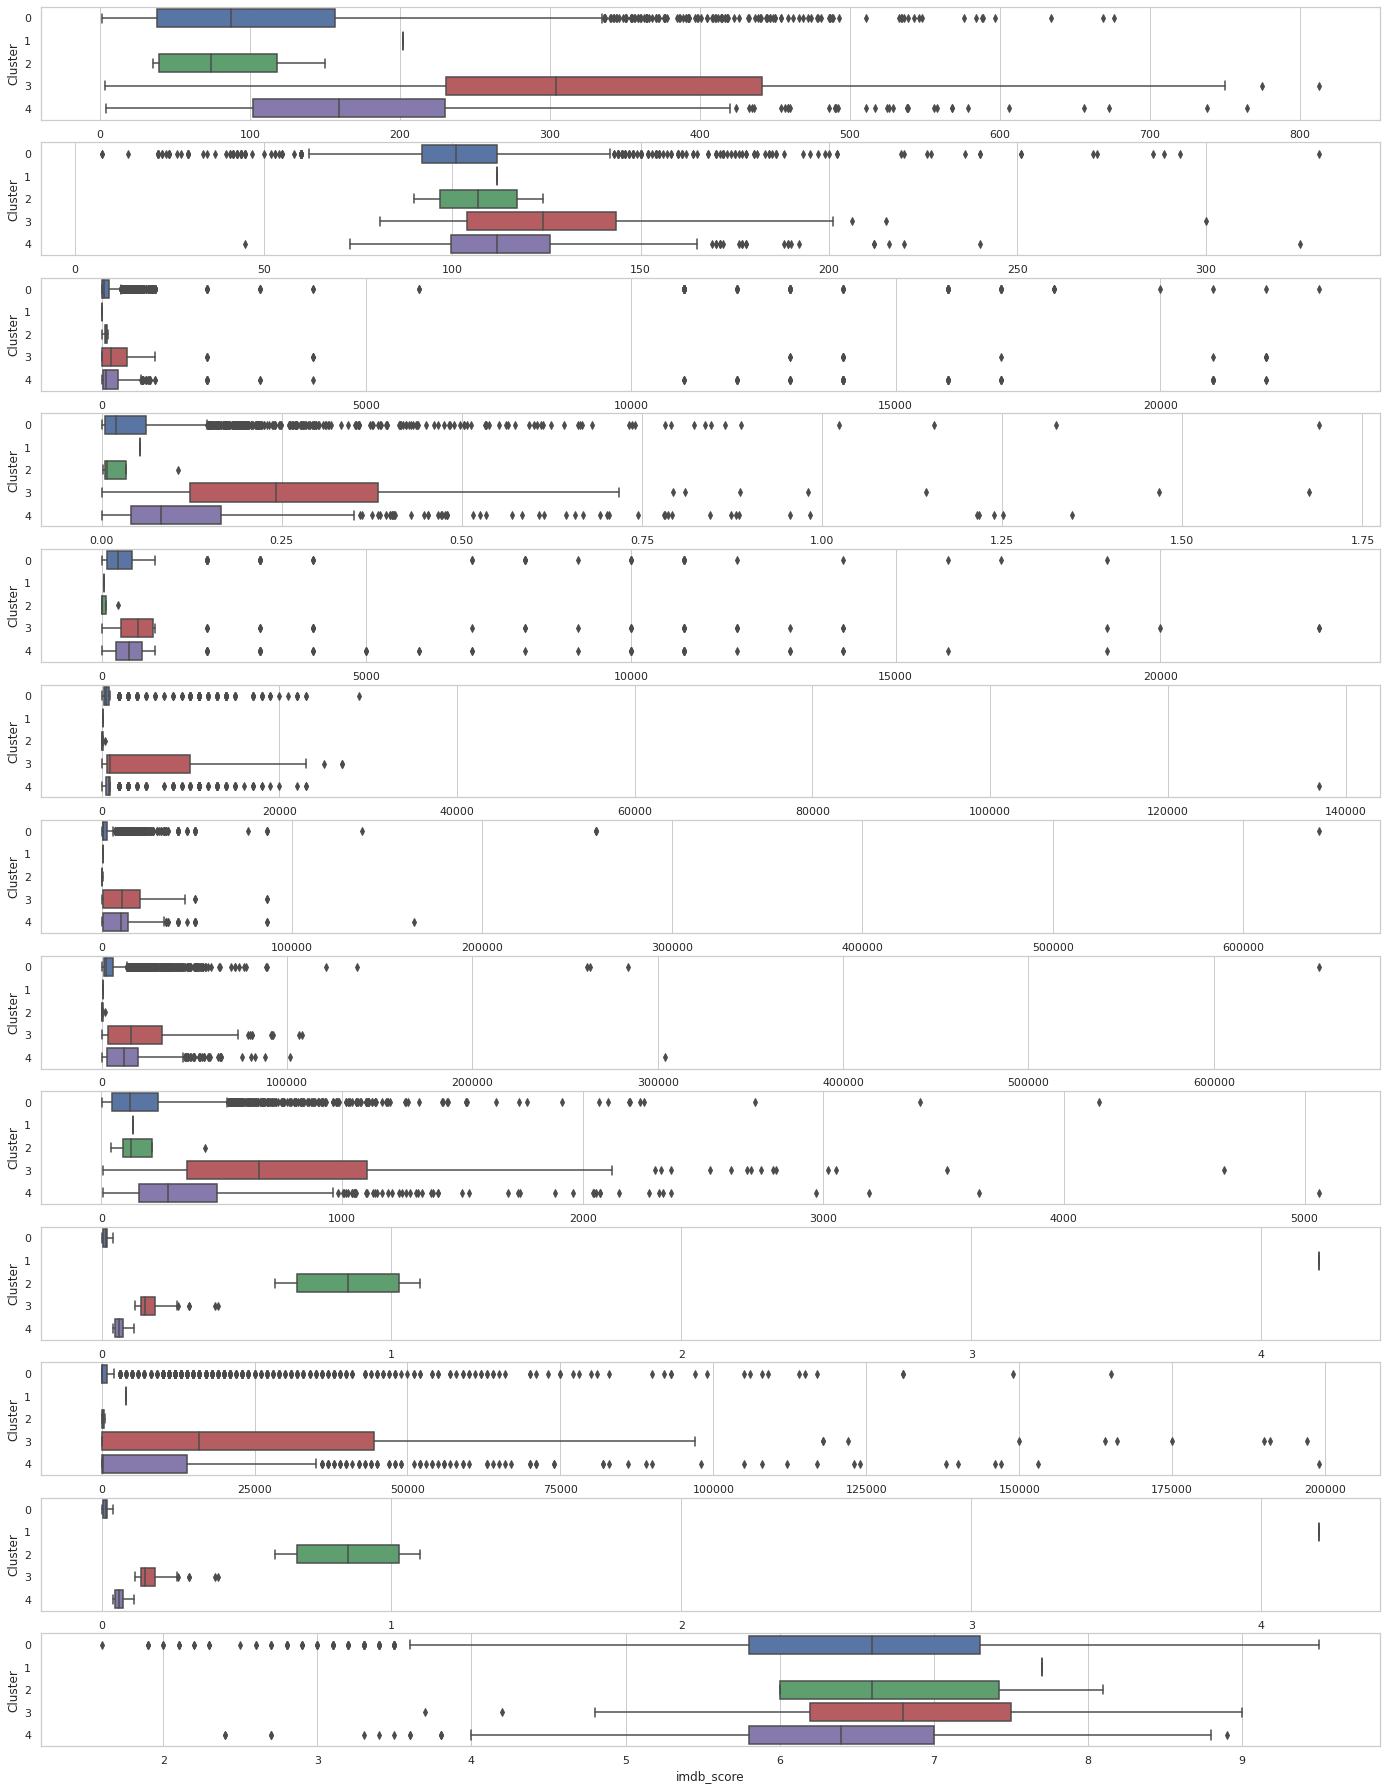

In [ ]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(13, 1, figsize=(24,32))
sb.boxplot(x = 'num_critic_for_reviews', y = 'Cluster', data = imdb_numk_labeled, ax = axes[0])
sb.boxplot(x = 'duration', y = 'Cluster', data = imdb_numk_labeled, ax = axes[1])
sb.boxplot(x = 'director_facebook_likes', y = 'Cluster', data = imdb_numk_labeled, ax = axes[2])
sb.boxplot(x = 'num_voted_users', y = 'Cluster', data = imdb_numk_labeled, ax = axes[3])
sb.boxplot(x = 'actor_3_facebook_likes', y = 'Cluster', data = imdb_numk_labeled, ax = axes[4])
sb.boxplot(x = 'actor_2_facebook_likes', y = 'Cluster', data = imdb_numk_labeled, ax = axes[5])
sb.boxplot(x = 'actor_1_facebook_likes', y = 'Cluster', data = imdb_numk_labeled, ax = axes[6])
sb.boxplot(x = 'cast_total_facebook_likes', y = 'Cluster', data = imdb_numk_labeled, ax = axes[7])
sb.boxplot(x = 'num_user_for_reviews', y = 'Cluster', data = imdb_numk_labeled, ax = axes[8])
sb.boxplot(x = 'budget', y = 'Cluster', data = imdb_numk_labeled, ax = axes[9])
sb.boxplot(x = 'movie_facebook_likes', y = 'Cluster', data = imdb_numk_labeled, ax = axes[10])
sb.boxplot(x = 'budget', y = 'Cluster', data = imdb_numk_labeled, ax = axes[11])
sb.boxplot(x = 'imdb_score', y = 'Cluster', data = imdb_numk_labeled, ax = axes[12])

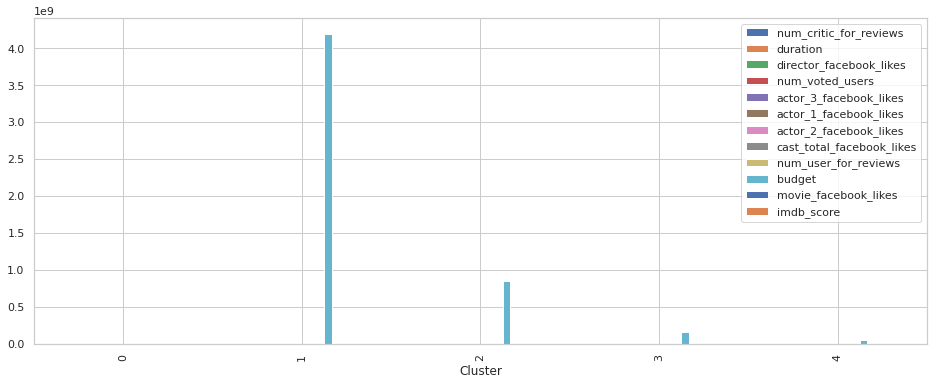

In [ ]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(imdb_numk_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Multi linear regression

In [ ]:
# cleaning the num variables
imdb_nums = imdb_copy1[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'num_voted_users', 'actor_3_facebook_likes',
                 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget',
                 'movie_facebook_likes', 'imdb_score']].copy()

# filling in null values with median
imdb_nums.fillna(imdb_nums.median(), inplace = True)

# remove remaining null
imdb_nums.dropna(inplace = True, axis = 0, how = "any")

# sanity check
imdb_nums.isnull().sum()
imdb_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     3933 non-null   float64
 1   duration                   3933 non-null   float64
 2   director_facebook_likes    3933 non-null   float64
 3   num_voted_users            3933 non-null   int64  
 4   actor_3_facebook_likes     3933 non-null   float64
 5   actor_1_facebook_likes     3933 non-null   float64
 6   actor_2_facebook_likes     3933 non-null   float64
 7   cast_total_facebook_likes  3933 non-null   int64  
 8   num_user_for_reviews       3933 non-null   float64
 9   budget                     3933 non-null   float64
 10  movie_facebook_likes       3933 non-null   int64  
 11  imdb_score                 3933 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 399.4 KB


Intercept of Regression 	: b =  [5.45823542]
Coefficients of Regression 	: a =  [[ 1.28848112e-03  7.17806368e-03  8.82240644e-06  3.61495718e-06
   6.74635446e-05  6.74635446e-05  1.45760077e-04  1.42766929e-04
  -1.42181853e-04 -5.12725513e-04 -4.89223321e-10 -1.29488957e-06]]

                   Predictors  Coefficients
0      num_critic_for_reviews  1.288481e-03
1                    duration  7.178064e-03
2     director_facebook_likes  8.822406e-06
3             num_voted_users  3.614957e-06
4      actor_3_facebook_likes  6.746354e-05
5      actor_3_facebook_likes  6.746354e-05
6      actor_2_facebook_likes  1.457601e-04
7      actor_1_facebook_likes  1.427669e-04
8   cast_total_facebook_likes -1.421819e-04
9        num_user_for_reviews -5.127255e-04
10                     budget -4.892233e-10
11       movie_facebook_likes -1.294890e-06



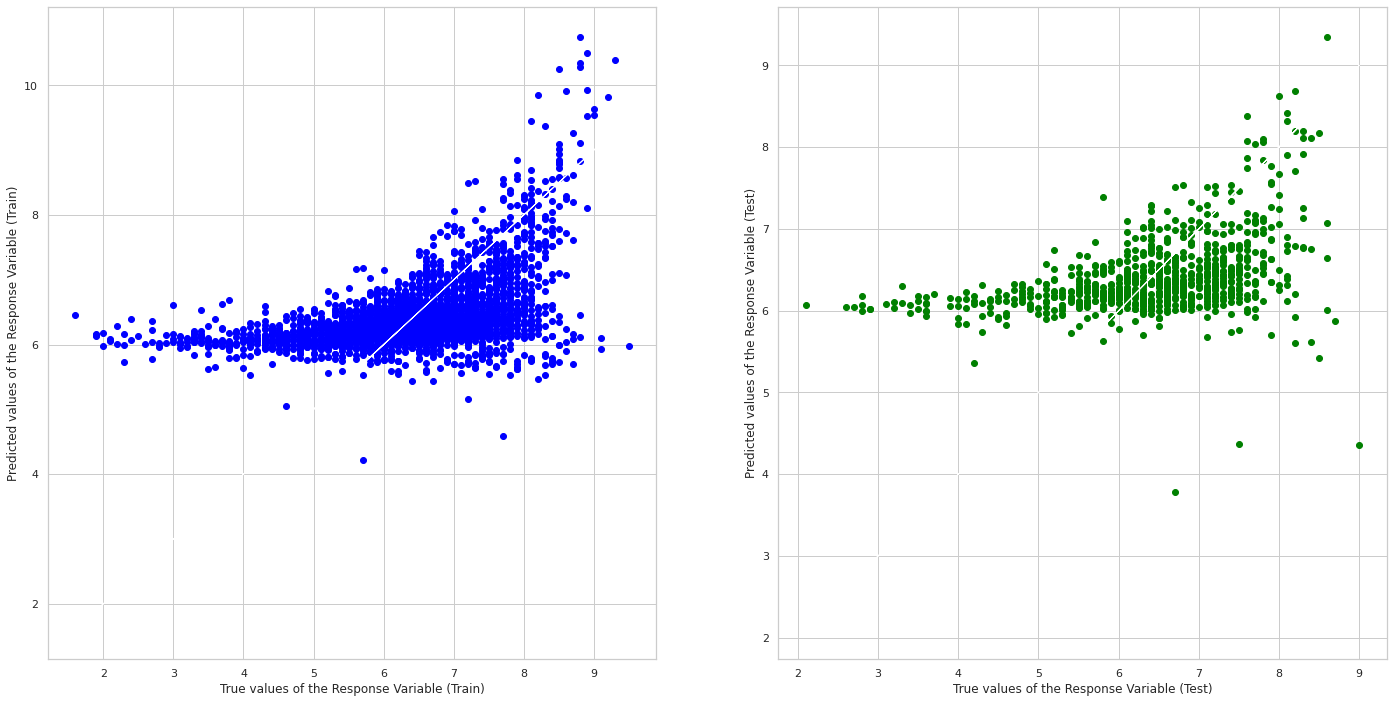

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.22834851772733822
Mean Squared Error (MSE) 	: 1.0054131545343088

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.18238400848015834
Mean Squared Error (MSE) 	: 1.0078221044522617



In [ ]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(imdb_nums["imdb_score"])
X = pd.DataFrame(imdb_nums[["num_critic_for_reviews", "duration", "director_facebook_likes", 
                            "num_voted_users", "actor_3_facebook_likes", "actor_3_facebook_likes",
                            "actor_2_facebook_likes", "actor_1_facebook_likes", "cast_total_facebook_likes",
                            "num_user_for_reviews", "budget", "movie_facebook_likes"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [5.33402023]
Coefficients of Regression 	: a =  [[ 1.40917536e-03  8.28607998e-03  1.09077930e-05  3.64277591e-06
   3.94726036e-05  3.94726036e-05  7.87740530e-05  8.01027028e-05
  -7.97015682e-05 -4.77478905e-04 -2.43976680e-09 -1.50063247e-06]]

                   Predictors  Coefficients
0      num_critic_for_reviews  1.409175e-03
1                    duration  8.286080e-03
2     director_facebook_likes  1.090779e-05
3             num_voted_users  3.642776e-06
4      actor_3_facebook_likes  3.947260e-05
5      actor_3_facebook_likes  3.947260e-05
6      actor_2_facebook_likes  7.877405e-05
7      actor_1_facebook_likes  8.010270e-05
8   cast_total_facebook_likes -7.970157e-05
9        num_user_for_reviews -4.774789e-04
10                     budget -2.439767e-09
11       movie_facebook_likes -1.500632e-06



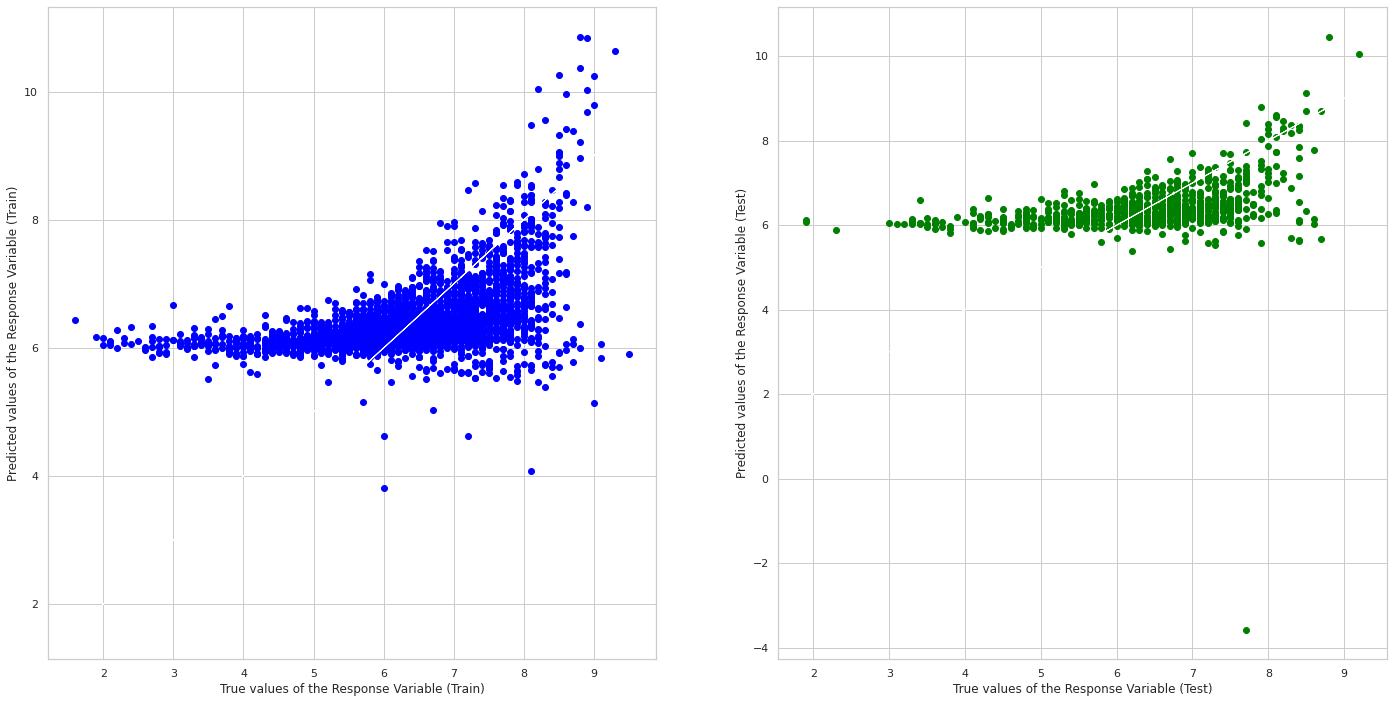

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2309994861254897
Mean Squared Error (MSE) 	: 0.9898028845073202

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11062945326802343
Mean Squared Error (MSE) 	: 1.1518122043889738



In [ ]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["num_critic_for_reviews", "duration", "director_facebook_likes", 
              "num_voted_users", "actor_3_facebook_likes", "actor_3_facebook_likes",
              "actor_2_facebook_likes", "actor_1_facebook_likes", "cast_total_facebook_likes",
              "num_user_for_reviews", "budget", "movie_facebook_likes"]

y = pd.DataFrame(imdb_nums["imdb_score"])
X = pd.DataFrame(imdb_nums[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# budget cpi

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/"

r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'html.parser')

table = soup.find('table')
rows = table.tbody.findAll('tr');

years = []
cpis = []

for row in rows:
    year = row.findAll('td')[0].get_text()
    if year.isdigit() and int(year) < 2017:
        years.append(int(year))
        cpis.append(float(row.findAll('td')[13].get_text()))

cpi_table = pd.DataFrame({
    "year": years,
    "avg_annual_cpi": cpis
})

cpi_table.head()

year  avg_annual_cpi
0  1913             9.9
1  1914            10.0
2  1915            10.1
3  1916            10.9
4  1917            12.8

In [ ]:
cpi_table.isnull().sum()

year              0
avg_annual_cpi    0
dtype: int64

In [ ]:
def get_real_value(nominal_amt, old_cpi, new_cpi):
    real_value = (nominal_amt * new_cpi) / old_cpi
    return real_value

In [ ]:
imdb_s = imdb.copy()

# replace na values with 0
imdb_s["gross"].fillna(0, inplace=True)
imdb_s["budget"].fillna(0, inplace=True)
imdb_s["title_year"].fillna(0, inplace=True)
imdb_s["country"].fillna("NaN", inplace=True)

# only consider movies made in the USA. Drop all other rows
imdb_s.drop(imdb_s[-(imdb_s["country"].str.contains("USA"))].index, inplace=True)

imdb_s.drop(imdb_s[(imdb_s["budget"] == 0) | (imdb_s["gross"] == 0) | 
                                (imdb_s["title_year"] == 0)].index, inplace=True)

In [ ]:
CPI_2016 = float(cpi_table[cpi_table['year'] == 2016]['avg_annual_cpi'])

In [ ]:
real_domestic_gross = []
real_budget_values = []

# must transform gross and budget values into real 2016 dollar terms
for index, row in imdb_s.iterrows():
    gross = row['gross']
    budget = row['budget']
    year = row['title_year']
    cpi = float(cpi_table[cpi_table['year'] == int(year)]['avg_annual_cpi'])
    
    real_gross = get_real_value(gross, cpi, CPI_2016)
    real_budget = get_real_value(budget, cpi, CPI_2016)
    real_domestic_gross.append(real_gross)
    real_budget_values.append(real_budget)

imdb_s["real_domestic_gross"] = real_domestic_gross
imdb_s["real_budget"] = real_budget_values   

In [ ]:
# drop the gross and budget cols because we won't use the nominal values
imdb_s.drop(labels='gross', axis=1, inplace=True)
imdb_s.drop(labels='budget', axis=1, inplace=True)
imdb_s.drop(labels='real_domestic_gross', axis=1, inplace=True)

imdb_s.head()

Unnamed: 0  color    director_name  num_critic_for_reviews  duration  \
1         2150  Color    Colin Higgins                    11.0     114.0   
5         1606  Color  Nick Cassavetes                   177.0     123.0   
7         3378  Color     John Schultz                    59.0      91.0   
8         2645  Color       Rob Zombie                   220.0     119.0   
10        5023  Color       Daryl Wein                    22.0      88.0   

    director_facebook_likes  actor_3_facebook_likes    actor_2_name  \
1                      19.0                   842.0    Barry Corbin   
5                     415.0                   545.0  Kevin Connolly   
7                      13.0                   292.0     Mark Webber   
8                       0.0                   593.0      Tyler Mane   
10                     38.0                   211.0   Heather Burns   

    actor_1_facebook_likes                genres  ... num_user_for_reviews  \
1                   1000.0        Comedy|Musical  ...                 48.0   
5                  33000.0         Drama|Romance  ...               1111.0   
7                    452.0  Comedy|Drama|Romance  ...                147.0   
8                    908.0                Horror  ...                491.0   
10                   331.0               Romance  ...                  8.0   

   language  country  content_rating title_year  actor_2_facebook_likes  \
1   English      USA               R     1982.0                   883.0   
5   English      USA           PG-13     2004.0                   638.0   
7   English      USA           PG-13     1999.0                   442.0   
8   English      USA               R     2009.0                   764.0   
10  English      USA             NaN     2009.0                   212.0   

   imdb_score aspect_ratio  movie_facebook_likes   real_budget  
1         5.8         2.35                     0  8.704917e+07  
5         7.9         2.35                 57000  3.684597e+07  
7         5.7         1.85                     0  1.152495e+07  
8         4.9         1.85                  3000  1.678081e+07  
10        6.2         2.35                   324  1.678081e+04  

[5 rows x 28 columns]

In [ ]:
imdb_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376 entries, 1 to 3929
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2376 non-null   int64  
 1   color                      2375 non-null   object 
 2   director_name              2376 non-null   object 
 3   num_critic_for_reviews     2375 non-null   float64
 4   duration                   2376 non-null   float64
 5   director_facebook_likes    2376 non-null   float64
 6   actor_3_facebook_likes     2372 non-null   float64
 7   actor_2_name               2374 non-null   object 
 8   actor_1_facebook_likes     2375 non-null   float64
 9   genres                     2376 non-null   object 
 10  actor_1_name               2375 non-null   object 
 11  movie_title                2376 non-null   object 
 12  num_voted_users            2376 non-null   int64  
 13  cast_total_facebook_likes  2376 non-null   int64